# <font color="#D57D6B">BÜRKELENS</font>
## Ludwig von Bürkel's Photographs Collection: A Data Analysis

This analysis is part of the project **Bürkelens** developed for the Electronic Publishing and Digital Storytelling course, part of the Digital Humanities and Digital Knowledge Master's Degree at the University of Bologna. The project features an analysis of German art historian **Ludwig von Bürkel**, who donated his collection of photographs of artworks to the **Photothek** of the **Kunsthistorisches Institute** in Florence in **1912**. The project focuses on the analysis of data of Bürkel's collection and its relation with the overall collection of the Photothek. The selection of Bürkel's collection as the focus of this project stems from its **recent digitization**, despite its entry into the archive in 1912. The figure of Bürkel and his collection remains relatively **unexplored**, so this project represents an opportunity to delve deeper into this topic and uncover new insights.

# Table of Contents

**[1. Preliminary information about data](#1.-Preliminary-information-about-data)**</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2 Scope of the project</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 Data Preparation</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.3 Dependencies</br>
**[2. Data extraction](#2.-Data-extraction)**</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 Extracting data about artworks and photographs</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 Creating a pandas dataframe</br>
**[3. Data cleaning](#3.-Data-cleaning)**</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1 Normalization of artists names for data integration</br>
**[4. Integrating data with SPARQL](#4.-Integrating-data-with-SPARQL)**</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1 SPARQL Query: Artists' Wikidata Names and URIs</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2 Use query results to fill the Artists Dataframe</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3 Second SPARQL Query: birthplace</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4 Update the dataframe with birthplace data</br>
**[5. Data visualization: Addressing research questions](#5.-Data-visualization:-Addressing-research-questions)**</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1 [Assess the impact of Ludwig von Bürkel's collection](#5.1-Assess-the-impact-of-Ludwig-von-Bürkel's-collection)</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.1 Are there objects of particular interest that Bürkel has contributed to document?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.2 Did the acquisition expand the KHI collection with photos of artworks that were not featured in the archive yet?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.3 How many unique photographs of a painting are entailed in Bürkel's collection?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.4 How are destroyed and missing paintings from Bürkel's photo collection represented in the KHI archive? What was Bürkel's contribution?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2 [Which categories were most impacted by the acquisition of Bürkel's collection?](#5.2-Which-categories-were-most-impacted-by-the-acquisition-of-Bürkel's-collection?)</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.1 What artists is the collection mainly focused on?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.2 What are the predominant countries of reference of the artworks?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.3 Which artistic period is predominantly represented in the photo collection?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.4 What photographers are mainly featured in the collection?</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.5 Where are the artworks depicted in Bürkel's collection located?</br>
**[6. Conclusion and recommendation for further research](#6.-Conclusion-and-recommendation-for-further-research)**</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.1 Impact on the overall collection</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.2 Impact on specific categories</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3 Recommendation for further research</br>


# 1. Preliminary information about data
***

Ludwig von Bürkel's collection of photographs features **231 photos** of mainly Renaissance and Baroque paintings. As a collaborator of the **Kunsthistorisches Institut in Florenz** the catalogation of photographs of the archive is part of my job. The majority photos from the Bürkel's collection were researched and catalogued between January and April 2023 on the database of the KHI. Notice that the cataloguing process of the Bürkel collection also included the research and cataloguing of **all other photos depicting the same paintings as the Bürkel collection** within the Photothek. The language used on database is German.

The following image (on the right) shows an example a database entry (*"Objekte"*) of the painting **"The Libyan Sybil"** by Guercino (on the left). The object is associated to a unique **document-ID** (*"OBJ-Dok.-Nr."*), the title, and further information about the painting. This painting is featured in Bürkel's collection, and the photograph entry is represented as a child-element of the main object.

<div class="row" style="content: "";display: table;clear: both;">
  <div class="column" style="float: left;width: 30%;padding:30px 20px 0 0"><img src="buerkel-data/sybil-museum.png"/><p><a href="https://raw.githubusercontent.com/AlessandraFa/buerkel-photos/main/buerkel-data/sybil-museum.png"><b>The Libyan Sybil</b></a></p><p>Royal Collection Trust / © His Majesty King Charles III 2023</p></div>
  <div class="column" style="float: left;width: 70%;"><img src="https://github.com/AlessandraFa/buerkel-photos/blob/main/buerkel-data/dataa.png?raw=true"/></div>
</div>

The following example shows the **photograph from Bürkel's collection** featuring Guercino's painting, and the expanded **photograph entry** included in the object document as child element. 
The image of Bürkel's photograph on the left represents the **photograph itself** as well as the **paper support** showing the inventory number (**13652**), the classification of the photograph in the archive, the stamp of the KHI and the ID of the digital version.

The database entry on the right shows information about the **physical photographic object**, such as the inventory number, the date of acquisition and the photo provenance (*"Buerkel, Ludwig von"*). The specification "physical photographic object" is necessary in this case, as the information in this *"Foto"* element are strictly related to the photograph donated by Ludwig von Bürkel, not to the **digital version** of the photograph. Information about the digitization are featured in the second *"Foto"* block shown in the image, which is not relevant for the following data analysis.


<div class="row" style="content: "";display: table;clear: both;">
  <div class="column" style="float: left;width: 30%;padding:20px 20px 0 0"><img src="https://raw.githubusercontent.com/AlessandraFa/buerkel-photos/main/buerkel-data/sybil-khi.pg.png"><p> &copy; Kunsthistorisches Institut in Florenz - Max-Planck-Institut, Photographer: Hanfstaengl.</p>
</div>
  <div class="column" style="float: left;width: 70%;"><img src="https://raw.githubusercontent.com/AlessandraFa/buerkel-photos/main/buerkel-data/data2.png"/></div>
</div>

The previous document represents an example of the simplest structure possible. However, there are some examples of layered objects representing more than one artwork or artworks entailing different parts that can be analyzed autonomously. In the following example, the object **07700713** represents the cycle of frescoes by Sebastiano del Piombo located in the chapel San Pietro Montorio in Rome. The child objects shown below represent each fresco ("*Wandbild*") belonging to the cycle. For example, the *Flagellation of Christ* (***"Geißelung Christi"***) corresponds to the object **07700713,T,005**; one photograph of this fresco from the Bürkel's collection is shown on the left.

<div class="row" style="content: "";display: table;clear: both;">
  <div class="column" style="float: left;width: 30%;padding:20px 20px 0 0"><img src="https://raw.githubusercontent.com/AlessandraFa/buerkel-photos/main/buerkel-data/img3.png"/><p>&copy; Kunsthistorisches Institut in Florenz - Max-Planck-Institut, Photographer: Anderson.</p></div>
  <div class="column" style="float: left;width: 70%;"><img src="https://raw.githubusercontent.com/AlessandraFa/buerkel-photos/main/buerkel-data/data3.png"/></div>
</div>

The recent common practice of the archive is to create elements with **as few levels as possible**, thus the maximum number of possible nested objects representing artwork is 2 - the **main level and one sublevel**. However, this limit was set recently, and the database still entails several examples of objects with 3 or more levels.

## 1.1 Scope of the project

The primary objective of this project is to <b>assess the impact of Ludwig von Bürkel's collection</b> on the overall collection of the KHI; in particular, we identify objects of particular interests for their role in the Photothek and its collection history. The second goal is to determine the <b>categories</b> on which the collection had a relevant impact, in particular to show the contribution of the collection in terms of artists, geographical reference, artistic periods, photographers, and locations. To address these questions, we analyze both Bürkel collection and the set of further photographs of the archive depicting the <b>same artworks</b> as Bürkel's collection. 

## 1.2 Data preparation
To prepare the data for the analyisis, the database was filtered through the field **Photo Provenance** (*"Aufnahmeherkunft"*) by setting "Buerkel, Ludwig von" as value. The resulting data was in XML format and included all paintings documents and the related photographs, with at least one photo from the Bürkel collection. The following examples shows the document related to the previous painting in XML format:

![Example Object from the XML document](https://raw.githubusercontent.com/AlessandraFa/buerkel-photos/main/buerkel-data/data4.png)

Each field is associated to a code, such as **"a5200"** for the object title and **"a8450"** for each photograph. Some fields consist of multiple levels, as in the case of *"Foto"*, that entails information about the photo object, or the artist (*"Object @ Künstler"*), containing information about the activity of the artist.

The next image represents the **"Foto" block** related to the physical photograph **13652**, entailing both simple elements and elements with multiple levels:

![Example Photo the XML document](images/data5.png)

## 1.3 Dependencies

The libraries **xmltodict**, **re**, and **pandas** were imported in order to convert the XML document into a dictionary, to use regular expressions to filter results, and to create dataframes containing relevant information.

In [1]:
!pip install xmltodict 
!pip install pandas
!pip install SPARQLWrapper
!pip install geopy
!pip install geopandas
!pip install geodatasets
!pip install plotly
!pip install --upgrade Nodejs
!pip install --upgrade --force-reinstall ipywidgets
!jupyter nbextension enable --py widgetsnbextension

  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached ipykernel-6.23.2-py3-none-any.whl (152 kB)
  Using cached traitlets-5.9.0-py3-none-any.whl (117 kB)
  Using cached ipython-8.14.0-py3-none-any.whl (798 kB)
  Using cached jupyterlab_widgets-3.0.7-py3-none-any.whl (198 kB)
  Using cached widgetsnbextension-4.0.7-py3-none-any.whl (2.1 MB)
  Using cached comm-0.1.3-py3-none-any.whl (6.6 kB)
  Using cached jupyter_core-5.3.0-py3-none-any.whl (93 kB)
  Using cached psutil-5.9.5-cp38-abi3-macosx_11_0_arm64.whl (246 kB)
  Using cached pyzmq-25.1.0-cp310-cp310-macosx_10_15_universal2.whl (1.8 MB)
  Using cached nest_asyncio-1.5.6-py3-none-any.whl (5.2 kB)
  Using cached jupyter_client-8.2.0-py3-none-any.whl (103 kB)
  Using cached debugpy-1.6.7-py2.py3-none-any.whl (4.9 MB)
  Using cached tornado-6.3.2-cp38-abi3-macosx_10_9_universal2.whl (424 kB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Usin

  Using cached wcwidth-0.2.6-py2.py3-none-any.whl (29 kB)
  Using cached asttokens-2.2.1-py2.py3-none-any.whl (26 kB)
  Using cached pure_eval-0.2.2-py3-none-any.whl (11 kB)
  Using cached executing-1.2.0-py2.py3-none-any.whl (24 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.6
    Uninstalling wcwidth-0.2.6:
      Successfully uninstalled wcwidth-0.2.6
  Attempting uninstall: pure-eval
    Found existing installation: pure-eval 0.2.2
    Uninstalling pure-eval-0.2.2:
      Successfully uninstalled pure-eval-0.2.2
  Attempting uninstall: ptyprocess
    Found existing installation: ptyprocess 0.7.0
    Uninstalling ptyprocess-0.7.0:
      Successfully uninstalled ptyprocess-0.7.0
  Attempting uninstall: pickleshare
    Found existing installation: pickleshare 0.7.5
    Uninstalling pickleshare-0.7.5:
      Successfully uninstalled pickleshare-0.7.5
  Attempting uninstall: executing
    Found existin

In [2]:
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
from csv import DictReader
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import ssl
from geopy.geocoders import Nominatim
import xmltodict
import re
import itertools
import json
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from matplotlib import font_manager as fm, rcParams
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyBboxPatch
import os
import geopandas
from geodatasets import get_path
import plotly.express as px
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
from pywaffle import Waffle


In [3]:
path_base = '/Users/alessandrafailla/Desktop/EPDS_Buerkel_Analysis/'
wd = Namespace("http://www.wikidata.org/entity/")
wdt = Namespace("http://www.wikidata.org/prop/direct/")
ssl._create_default_https_context = ssl._create_unverified_context
geolocator = Nominatim(timeout=10, user_agent="myGeolocator")

# 2. Data extraction
***

The first part of the analysis deals with the extraction of data about the collection to be inserted into a pandas dataframe. As shown above, the data is in XML format and presents multiple levels; it needs thus to be processed to be integrated in the dataframe. This format comes with several structured-related challenges that will be addressed throughout the analysis.

In [4]:
# Converting corrupted strings during the encoding to provide correct data
converter = {'Musï¿½?es' : 'Musées',
             'Musï¿½?e' : 'Musée',
             'Szï¿½?pmÃ¼vï¿½?szeti' : 'Szépmüvészeti',
             'Ã¼' : 'ü', 'ï¿½?' : 'ö',
             'Ã¤' : 'ä', 'ÃŸ' : 'ß',
             'Ã–' : 'Ö', 'Ãœ' : 'Ü',
             'Ã„' : 'Ä', '?ï¿½ï¿½' : '-',
             'Å•' : 'à', 'Åˆ' : 'ò',
             'Å¯' : 'ù','Ä›' : 'ì',
             ' Ã©' : 'é', 'Ãº' : 'ú'}

In [5]:
# Open and correct xml file to be used for data analysis: save content into a string
string_ = []
with open("combined.xml", encoding = "Windows-1252") as xmlfile:
    for i in xmlfile.readlines():
        for k in converter:
            i = i.replace(k, converter[k])
        string_.append(i)

string_=''.join(string_)        

In [6]:
# Save correct file content from string into a new file
text_file = open("cleaned_string.xml", "w")

# Write string to file
text_file.write(string_)
 
# Close file
text_file.close()

In [7]:
# Open XML file as a dictionary to start the data analysis
with open("cleaned_string.xml", encoding = "utf-8") as xmlfile:
    KHI_xml = xmltodict.parse(xmlfile.read(), encoding = "utf-8")

In [8]:
# List of dictionaries containing a first draft of information about artworks and photographs 
# (only first record is shown)
KHI_xml['root']['obj'][:1]

[{'@xmlns:edp': 'http://www.stegmannsystems.com/2009/edp',
  '@xmlns:edpf': 'http://www.stegmannsystems.com/2009/edp-function',
  '@xmlns:edpm': 'http://www.stegmannsystems.com/2009/edp-meta',
  '@xmlns:h1': 'http://www.startext.de/HiDA/DefService/XMLSchema',
  '@xmlns:ns1': 'http://www.w3.org/1999/xhtml',
  '@edp:updated': '2022-09-02T14:14:29Z',
  '@edp:updatedBy': 'scharenberg@khi.fi.it',
  '@edp:version': '7',
  '@lvl': '1',
  '@edp:createdBy': 'unknown',
  '@edp:created': '2017-09-04T17:13:01Z',
  '@edp:eddVersion': '2.7.0',
  '@did': '10209054',
  'a5000': '70010647',
  'Status': 'published',
  'a5200': ['Noli me tangere', 'Christus erscheint Maria Magdalena'],
  'aob30': {'a3100': 'Tizian',
   'a3475': 'Maler',
   'a3000': {'@edp:augmented': 'kue::02553142', '#text': '02553142'},
   'a31nn': {'@edp:augmented': 'kue::02553142', '#text': 'Tizian'},
   'a3105': {'@edp:augmented': 'kue::02553142',
    '#text': 'Vecellio, Tiziano (1) & Tiziano & Titian & Tiziano Vecelio'},
   'a30gn'

## 2.1 Extracting data about artworks and photographs
The following step consists of the **extraction of information** about photographs and depicted artworks, central elements of this analysis. Due to the layered record structure, several measures were implemented to perform the extraction on several levels. As explained in the introduction, each record - or "document" - of the database represents one or more strictly related artworks; photographs are recorded as children elements of the artworks they depict. The **goal** of this section is to create a dictionary containing information about the artworks featured in the collection and the related photographs that are relevant for the analysis.

In [9]:
# Auxiliary function to deal with both lists of dictionaries and single dictionaries featured in the data:
# lists occur in case of multiple instances of an element inside a record; e.g., if an object contains
# multiple photos, these will be shown as a list of dictionaries.
def risolvi_dict_o_list(vocab, key):
    if vocab:
        if isinstance(vocab, list):
            vocab = vocab[0]
        if key in vocab.keys():
            return vocab[key]
    return None

The following functions allow to insert the necessary information from the collection into a Python dictionary; the first function extracts photographs-related informations. The codes included in the XML document are used to indentify the required fields. The related keys present the prefix **"Photo"**, indicating that the data describes a photograph. This function allows to collect data about:
* **id (a84fl)**: the inventory number of the photograph
* **Photo_ArchivalDate (a8496)**: the date of acquisition of the photograph
* **Photo_Provenance (a8498)**: the provenance of the photograph (e.g. the name of the previous owner or collection)
* **Photo_KHI_Classification (a8515)**: the category of the KHI classification, indicating the technique and artistic period of the depicted object
* **Photo_AcquisitionDate (a8494)**: the date of creation of the photograph
* **Photo_Photographer (a8490)**: the name of the photographer

In [10]:
# Function to extract photos IDs and use them as dict-keys of a new dictionary:
def estrai_info_ph(record):
    art_dict = {}
    art_dict['id'] = record['a84fl']
    art_dict['Photo_ArchivalDate'] = risolvi_dict_o_list(record,'a8496')
    art_dict['Photo_Provenance'] = risolvi_dict_o_list(record, 'a8498')
    art_dict['Photo_KHI_Classification'] = risolvi_dict_o_list(record,'a8515')
    art_dict['Photo_AcquisitionDate'] = risolvi_dict_o_list(record,'a8494')
    art_dict['Photo_Photographer'] = risolvi_dict_o_list(record,'a8490')
    return art_dict

The following function identifies information about the depicted artworks in the dictionary created at the beginning of the section, including:
* **Art_id (a5000)**: the ID of the depicted object at the main level 
* **Art_id_sublevel (a5001)**: the ID of the depicted object at a sub-level
* **Art_Type (a5230)**: the technical term that describes the object in consideration
* **Art_Title (a5200)**: the title of the artwork if it is not an architectural object
* **Art_building_name (a5202)**: the name of the architectural object
* **Art_GeoStyle (a5130)**: in case of an unknown artist, the description of the style related to the territory of origin
* **Art_ActualState (a5210)**: optional information about the conditions of the artwork if damaged, destroyed, or missing
* **Art_Artist (a3100)**: the artist 
* **Art_GeoLocation (a2864)**: the location of the artwork (in case of movable objects)
* **Art_Institution (a2900)**: the holding institution of the artwork (in case of movable objects)
* **Art_PhysLocation_Geo (a2664)**: the location of the artwork (in case of immovable objects)
* **Art_PhysLocation_Name (a2700)**: the name of the building in which the artwork is stored (in case of immovable objects)
* **Art_Date (a5064)**: generally the date of creation of the artwork (not always included if the artist is known)

Differently from the previous function, here we have additional variables that allow to distinguish stored information from different levels ("*subfix*") and to extract information contained in lower levels (such as artists names).

In [11]:
# Function to extract data about artworks depicted in the photos for each record level 
# using field codes and insert it into a dictionary:
def estrai_info_general(record,subfix = '0'):
    art_dict = {}
    art_dict['Art_id' + subfix] = risolvi_dict_o_list(record,'a5000')
    art_dict['Art_id_sublevel' + subfix] = risolvi_dict_o_list(record,'a5001')
    art_dict['Art_type' + subfix] = risolvi_dict_o_list(record, 'a5230')
    art_dict['Art_title' + subfix] = risolvi_dict_o_list(record, 'a5200')
    art_dict['Art_building_name' + subfix] = risolvi_dict_o_list(record, 'a5202')
    art_dict['Art_GeoStyle' + subfix] = risolvi_dict_o_list(record, 'a5130')
    art_dict['Art_ActualState' + subfix] = risolvi_dict_o_list(record, 'a5210')
    tmp = risolvi_dict_o_list(record, 'aob30')
    art_dict['Art_Artist' + subfix] = risolvi_dict_o_list(tmp, 'a3100') 
    tmp1 = risolvi_dict_o_list(record, 'aob28')
    art_dict['Art_GeoLocation' + subfix] = risolvi_dict_o_list(tmp1, 'a2864')
    tmp2 = risolvi_dict_o_list(record, 'aob28')
    art_dict['Art_Institution' + subfix] = risolvi_dict_o_list(tmp2, 'a2900')  
    tmp2 = risolvi_dict_o_list(record, 'aob26')
    art_dict['Art_PhysLocation_Geo' + subfix] = risolvi_dict_o_list(tmp2, 'a2664') 
    tmp3 = risolvi_dict_o_list(record, 'aob26')
    art_dict['Art_PhysLocation_Name' + subfix] = risolvi_dict_o_list(tmp3, 'a2700')
    tmp4 = risolvi_dict_o_list(record, 'a5060')
    art_dict['Art_Date' + subfix] = risolvi_dict_o_list(tmp4, 'a5064')
    return art_dict

Photographs **inventory numbers** are used as IDs of each dictionary entry. Such IDs are used as keys of a dictionary containing information about the photograph and the depicted object. IDs are extracted using the following function, which associates each photo inventory number with further data about the photo. Notice that, if an object document entails more than one photograph, the "*Foto*" objects are stored as a list of dictionaries; this is the case for all multi-level elements appearing multiple times inside an object.

In [13]:
# Function to locate photographs records and return a list of dictionaries containing only data about photos:
# in case of multiples photos, photo objects appear as dictionaries in a list; 
# extract information about each photo object using the previous function about photographic data 
# and insert it in a dictionary to be included in a list that is returned at the end of the function:
def trova_foto(document):
    list_of_dict = []
    if 'a8450' in document.keys():
        if isinstance(document['a8450'], list):
            for ph_dict in document['a8450']:
                info = estrai_info_ph(ph_dict)
                list_of_dict.append(info)
        else:
            base_dict = {}
            info = estrai_info_ph(document['a8450'])
            list_of_dict.append(info)
    return list_of_dict

The previous functions are implemented in the following cell to fill a **dictionary with photo-IDs** as keys and all further informations as nested values. The following snippet operates on three data levels - from **levels 0 to 2** - to integrate information. Although 4-level documents exist on the database, the analysis will conver up to the third level, since the current practice of the archive is to **limit high-depth documents** - meaning documents with more than 2 levels. Before iterating to find data on lower levels, the existence of a sublevel is checked using the string *"obj"*, that identifies an object block.

The following **graph** provides an simplified overview of all possible objects combination in a document - an object being an artwork or a :

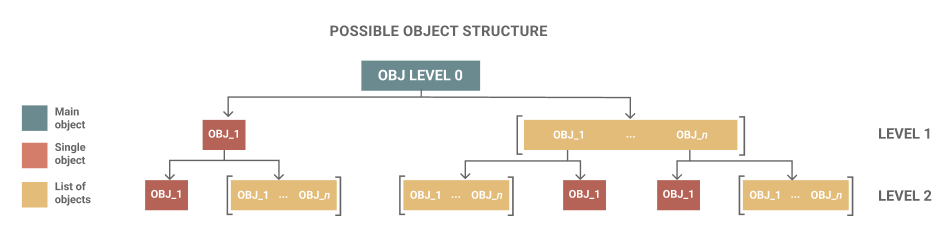

In [14]:
# Fill a dictionary with information about artworks and photographs iterating 
# on multiple levels if necessary (up to 3 levels)
foto_dict = {}

# Fill a data structure containing only data about photographs by considering each artwork object and
# storing all related photo-data at level 0. Then store all information about the artwork in a separate variable.
for document in KHI_xml['root']['obj']:
    result_level_0 = trova_foto(document)
    info = estrai_info_general(document)
    
    # For each photo stored at level 0, assign the photo-ID as key of a dictionary with a dictionary as value
    # containig all photo-data; finally, update the dictionary with information about the depicted artworks
    for foto in result_level_0:
        foto_dict[foto['id']] = foto
        foto_dict[foto['id']].update(info)
    
    # From here, we deal with objects at lower levels:
    # if a document entails more than one object at lower levels, they appear stored in lists;
    # we consider each "obj" in the list separately.
    # We look for photo and artwork data and store them as two dictionaries; as for the previous snippet,
    # photo IDs are used as keys for new dictionaries with a dict as value containing photo and artwork information,
    # and, additionally, data from level 0 to fill possible missing values; subfixes are used to distinguish levels.
    if 'obj' in document.keys():
        if isinstance(document['obj'], list):
            for objects in document['obj']:                
                result_level_1 = trova_foto(objects)
                info_lv1 = estrai_info_general(objects, subfix= '1')
                for foto in result_level_1:
                    foto_dict[foto['id']] = foto
                    foto_dict[foto['id']].update(info)
                    foto_dict[foto['id']].update(info_lv1)
                
                # The same procedure is repeated for level 2, in both cases of availability
                # of single or multiple objects:
                if 'obj' in objects.keys():
                    if isinstance(objects['obj'], list):
                        for elements in document['obj']:
                            result_level_2 = trova_foto(elements)
                            info_lv2 = estrai_info_general(elements, subfix= '2')
                            for foto in result_level_2:
                                foto_dict[foto['id']] = foto
                                foto_dict[foto['id']].update(info)
                                foto_dict[foto['id']].update(info_lv2)
                    else:
                        result_level_2 = trova_foto(objects['obj'])
                        info_lv2 = estrai_info_general(objects['obj'], subfix= '2')
                        for foto in result_level_2:
                            foto_dict[foto['id']] = foto
                            foto_dict[foto['id']].update(info)
                            foto_dict[foto['id']].update(info_lv2)
                    
        # The same procedure is repeated here, in case there is only one object at level one,
        # thus not stored in a list            
        else:
            result_level_1 = trova_foto(document['obj'])
            info_lv1 = estrai_info_general(document['obj'], subfix= '1')
            for foto in result_level_1:
                foto_dict[foto['id']] = foto
                foto_dict[foto['id']].update(info)
                foto_dict[foto['id']].update(info_lv1)
            if 'obj' in document['obj'].keys():
                if isinstance(document['obj'], list):
                    for objects in document['obj']:
                        result_level_1 = trova_foto(objects)
                        info_lv1 = estrai_info_general(objects, subfix= '1')
                        for foto in result_level_1:
                            foto_dict[foto['id']] = foto
                            foto_dict[foto['id']].update(info)
                            foto_dict[foto['id']].update(info_lv1)
                        if 'obj' in objects.keys():
                            if isinstance(objects['obj'], list):
                                for elements in document['obj']:
                                    result_level_2 = trova_foto(elements)
                                    info_lv2 = estrai_info_general(elements, subfix= '2')
                                    for foto in result_level_2:
                                        foto_dict[foto['id']] = foto
                                        foto_dict[foto['id']].update(info)
                                        foto_dict[foto['id']].update(info_lv2)
                            else:
                                result_level_2 = trova_foto(objects['obj'])
                                info_lv2 = estrai_info_general(objects['obj'], subfix= '2')
                                for foto in result_level_2:
                                    foto_dict[foto['id']] = foto
                                    foto_dict[foto['id']].update(info)
                                    foto_dict[foto['id']].update(info_lv2)

# Integrating the category field with the first element of the list, which is relevant for the analysis
for i in foto_dict:
    if isinstance(foto_dict[i]['Photo_KHI_Classification'], list):
        foto_dict[i]['Photo_KHI_Classification'] = foto_dict[i]['Photo_KHI_Classification'][0]

The result is a dictionary containing information about **photo objects** and their **subject**; photo IDs are used as keys, while a nested dictionary containing photos- and artworks data appear as value. The following examples contains data about the photo 13551. Notice that **two photo occurrences** are shown: 13551 and 13551; the first indicates the **physical photographic object** stored in the archive, while the second represents the digital photograph of the same object. The latter will be later excluded from the data as it is not relevant for the analysis conducted in this project.

In [15]:
# Two records from the updated dictionary:
dict(itertools.islice(foto_dict.items(), 2))

{'13551': {'id': '13551',
  'Photo_ArchivalDate': '1912',
  'Photo_Provenance': 'Buerkel, Ludwig von',
  'Photo_KHI_Classification': 'Mal. Ren.',
  'Photo_AcquisitionDate': 'vor 1903',
  'Photo_Photographer': 'Hanfstaengl',
  'Art_id0': '70010647',
  'Art_id_sublevel0': None,
  'Art_type0': 'Bild',
  'Art_title0': ['Noli me tangere', 'Christus erscheint Maria Magdalena'],
  'Art_building_name0': None,
  'Art_GeoStyle0': None,
  'Art_ActualState0': None,
  'Art_Artist0': 'Tizian',
  'Art_GeoLocation0': 'London',
  'Art_Institution0': 'National Gallery',
  'Art_PhysLocation_Geo0': None,
  'Art_PhysLocation_Name0': None,
  'Art_Date0': 'um 1514'},
 '13551scan': {'id': '13551scan',
  'Photo_ArchivalDate': '2021.11.16',
  'Photo_Provenance': None,
  'Photo_KHI_Classification': None,
  'Photo_AcquisitionDate': ['vor 1903', '2021.10'],
  'Photo_Photographer': ['Hanfstaengl',
   'Digitallabor KHI nach historischer Vorlage'],
  'Art_id0': '70010647',
  'Art_id_sublevel0': None,
  'Art_type0': '

## 2.2 Creating a pandas dataframe

We use the **pandas** library to convert the dictionary into a dataframe ```df```. The dataframe entails all object levels indicated with the subfixes "_0", "_1", "_2" in the column headings. The photo ID is show as index of the dataframe.

In [16]:
# Initialize a pandas dataframe from the obtained dictionary
df = pd.DataFrame.from_dict(foto_dict, 'index')

# Create csv file from the dataframe
df.to_csv(path_base + "dataframe_all_photos_raw.csv")
df.head()

,id,Photo_ArchivalDate,Photo_Provenance,Photo_KHI_Classification,Photo_AcquisitionDate,Photo_Photographer,Art_id0,Art_id_sublevel0,Art_type0,Art_title0,...,Art_title2,Art_building_name2,Art_GeoStyle2,Art_ActualState2,Art_Artist2,Art_GeoLocation2,Art_Institution2,Art_PhysLocation_Geo2,Art_PhysLocation_Name2,Art_Date2
13551,13551,1912,"Buerkel, Ludwig von",Mal. Ren.,vor 1903,Hanfstaengl,70010647,None,Bild,"[Noli me tangere, Christus erscheint Maria Mag...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13551scan,13551scan,2021.11.16,None,None,"[vor 1903, 2021.10]","[Hanfstaengl, Digitallabor KHI nach historisch...",70010647,None,Bild,"[Noli me tangere, Christus erscheint Maria Mag...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13126,13126,1912,"Buerkel, Ludwig von",Mal. Ren.,vor 1897,Hanfstaengl,07705412,None,Bild,Berufung der Söhne des Zebedäus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13126scan,13126scan,2022.11.21,None,None,"[vor 1897, 2022.10.04]","[Hanfstaengl, Digitallabor KHI nach historisch...",07705412,None,Bild,Berufung der Söhne des Zebedäus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401264,401264,1982.08.26,None,Mal. Ren.,None,None,07705412,None,Bild,Berufung der Söhne des Zebedäus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At the moment, the number of photographs recorded in the dataframe exceeds the actual number of photographs to be considered for the analysis. Each **digitalized photograph** is, in fact, recorded twice on the database, once as a physical photographic object, and once as the digital photograph of the physical object (identified with the subfix "*-scan*" after the inventory number. The second record is not relevant for this analysis and needs to be filtered out, thus we create a new dataframe:

In [17]:
# Create a new dataframe by filtering out data about the digital version of photos and reset the dataframe index
df_noscan = df.loc[~df['id'].str.contains('scan')].reset_index(drop = True)
df_noscan.head()

,id,Photo_ArchivalDate,Photo_Provenance,Photo_KHI_Classification,Photo_AcquisitionDate,Photo_Photographer,Art_id0,Art_id_sublevel0,Art_type0,Art_title0,...,Art_title2,Art_building_name2,Art_GeoStyle2,Art_ActualState2,Art_Artist2,Art_GeoLocation2,Art_Institution2,Art_PhysLocation_Geo2,Art_PhysLocation_Name2,Art_Date2
0,13551,1912,"Buerkel, Ludwig von",Mal. Ren.,vor 1903,Hanfstaengl,70010647,None,Bild,"[Noli me tangere, Christus erscheint Maria Mag...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13126,1912,"Buerkel, Ludwig von",Mal. Ren.,vor 1897,Hanfstaengl,07705412,None,Bild,Berufung der Söhne des Zebedäus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,401264,1982.08.26,None,Mal. Ren.,None,None,07705412,None,Bild,Berufung der Söhne des Zebedäus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,434204,1986.05.13,"Heinemann, Fritz",Mal. Ren.,None,None,07705412,None,Bild,Berufung der Söhne des Zebedäus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13433,1912,"Buerkel, Ludwig von",Mal. Ren.,vor 1903,Hanfstaengl,70013046,None,Bild,Maria mit dem Kind und den heiligen Katharina ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe ```df_noscan``` contains 708 entries, corresponding to **708 photographs**.
These photographs belong either to Bürkel's collection or to other collections from the KHI. They all represent **artworks featured in the Bürkel collection**, the starting point of this analysis.
It is possible to check how many photos belong to the Ludwig von Bürkel collection using the following method; notice that the provenance of several photographs is unknown or not specified and do not appear in the list:

In [18]:
df_noscan['Photo_Provenance'].value_counts().head(15)

Buerkel, Ludwig von                  231
Bodmer-Bodmer, D. (Frau)              28
Gebhard, Fritz                        19
Heinemann, Fritz                      14
Heikamp, Detlef                       13
Pudelko, Georg                        10
Fine Arts Museum of San Francisco      9
Pineider                               9
Städelsches Kunstinstitut              8
Vannini Parenti                        7
Hueck, Irene                           7
Ludwig, Gustav, 1905                   7
Donati, Pier Paolo                     6
Ergas, Rudolf                          6
Bader, Alfred                          6
Name: Photo_Provenance, dtype: int64

We initialize a further dataframe containing only information about the **photographs from the Bürkel collection**, to be used later in the analysis:

# 3. Data cleaning
***

To provide a most possible accurate analysis and allow **operations with data**, we need to clean and organize the dataset. </br> We first modify the dates of archival of the photographs by converting empty spaces into 0, while existing dates are converted to the format **YYYY** and then into **integers** to allow numerical comparison:

In [19]:
# Operating on the column 'Photo_ArchivalDate':
# convert missing data into 0;
# convert all dates into the format YYYY (remove MM.DD if necessary) and convert into int.
def transform_in_int_dates(x):
    if not isinstance(x, int):
        return int(x[:4])
    return x

df_noscan['Photo_ArchivalDate'].fillna(value= 0, inplace = True)
df_noscan['Photo_ArchivalDate'] = df_noscan['Photo_ArchivalDate'].apply(transform_in_int_dates)

The following cells operate on different columns to **fill empty spots** with information on lower levels, if necessary. If a photograph is located on a lower level the correspondent row in the dataframe will be filled with data from that level. However, if useful data is present on higher level, it will not be overwritten with the same kind of data from lower levels. We operate on the following categories:
* ```Art_type```: the type of artwork depicted
* ```Art_title```: the title of the artwork
* ```Art_id```: the ID of the artwork
* ```Art_building_name```: the name of the architecture (it is removed, as the collection only features paintings)
* ```Art_Artist```: the artist
* ```Art_GeoLocation``` (movable objects) and ```Art_PhysLocation_Geo``` (immovable objects): the artwork location; these entries are merged into a single column
* ```Art_Institution``` (movable objects) and ```Art_PhysLocation_Name``` (immovable objects): the name of the holding institution; these entries are merged into a single column
* ```Photo_Photographer```: the photographers featured in the collections

In [20]:
# Art_type:
# Check if Art_type0 contains data, otherwise replace content with Art_type1 (or 2 if Art_type1 is empty)
df_noscan.loc[df_noscan['Art_type0'].isnull(),'Art_type0'] = df_noscan.loc[df_noscan['Art_type0'].isnull(),'Art_type1']
df_noscan.loc[df_noscan['Art_type0'].isnull(),'Art_type0'] = df_noscan.loc[df_noscan['Art_type0'].isnull(),'Art_type2']


# Art_title:
# Check if Art_title0 contains data, otherwise replace content with Art_title1 (or 2 if Art_title1 is empty)
# If both Art_title1&2 both contain data, aggregate data using "," as a separator under Art_title - but never the case
df_noscan.loc[df_noscan['Art_title0'].isnull(),'Art_title0'] = df_noscan.loc[df_noscan['Art_title0'].isnull(),'Art_title1']
df_noscan.loc[df_noscan['Art_title0'].isnull(),'Art_title0'] = df_noscan.loc[df_noscan['Art_title0'].isnull(),'Art_title2']


#Art_id:
# Check if Art_id0 contains data, otherwise replace content with other id-fields
df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id0'] = df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id_sublevel0']
df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id0'] = df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id1']
df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id0'] = df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id_sublevel1']
df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id0'] = df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id2']
df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id0'] = df_noscan.loc[df_noscan['Art_id0'].isnull(),'Art_id_sublevel2']


building_name_removed = False

# Art_building_name:
# We can remove this column, since the collection only features paintings
if building_name_removed == False:
    df_noscan.drop(columns=['Art_building_name0', 'Art_building_name1', 'Art_building_name2'], inplace=True)
    building_name_removed = True
    
df_noscan.reset_index(inplace=True, drop = True)

# Art_Artist:
# Check if Art_Artist0 contains data, otherwise replace content with other id-fields
df_noscan.loc[df_noscan['Art_Artist0'].isnull(),'Art_Artist0'] = df_noscan.loc[df_noscan['Art_Artist0'].isnull(),'Art_Artist1']
df_noscan.loc[df_noscan['Art_Artist0'].isnull(),'Art_Artist0'] = df_noscan.loc[df_noscan['Art_Artist0'].isnull(),'Art_Artist2']


```Art_GeoLocation``` and ```Art_PhysLocation_Geo``` entail the same kind of data, namely the geographic location of the artwork, so we first fill the empty spots for each column and then **merge the columns** to obtain a complete list of locations of the artworks:

In [21]:
# Art_GeoLocation:
# Check if Art_GeoLocation0 contains data, otherwise replace content with Art_GeoLocation1 or 2 
# and remove subfix numbers
df_noscan.loc[df_noscan['Art_GeoLocation0'].isnull(),'Art_GeoLocation0'] = df_noscan.loc[df_noscan['Art_GeoLocation0'].isnull(),'Art_GeoLocation1']
df_noscan.loc[df_noscan['Art_GeoLocation0'].isnull(),'Art_GeoLocation0'] = df_noscan.loc[df_noscan['Art_GeoLocation0'].isnull(),'Art_GeoLocation2']


# Art_PhysLocation_Geo:
# Check if Art_PhysLocation_Geo0 contains data, otherwise replace content with Art_PhysLocation_Geo1 or 2 and remove subfix numbers
df_noscan.loc[df_noscan['Art_PhysLocation_Geo0'].isnull(),'Art_PhysLocation_Geo0'] = df_noscan.loc[df_noscan['Art_PhysLocation_Geo0'].isnull(),'Art_PhysLocation_Geo1']
df_noscan.loc[df_noscan['Art_PhysLocation_Geo0'].isnull(),'Art_PhysLocation_Geo0'] = df_noscan.loc[df_noscan['Art_PhysLocation_Geo0'].isnull(),'Art_PhysLocation_Geo2']


# Merge columns Art_GeoLocation and Art_Physlocation_Geo to have a single Art_GeoLocation column
df_noscan['Art_GeoLocation0'].fillna(df_noscan['Art_PhysLocation_Geo0'], inplace=True)


```Art_Institution``` and ```Art_PhysLocation_Name``` entail the same kind of data, namely the name of the institution, organization, or church holding the artwork, so we first fill the empty spots for each column and then **merge the columns** to obtain a complete list of locations of the artworks:

In [22]:
# Art_Institution
# Check if Art_Institution0 contains data, otherwise replace content with Art_Institution1 or 2 and remove subfix numbers
df_noscan.loc[df_noscan['Art_Institution0'].isnull(),'Art_Institution0'] = df_noscan.loc[df_noscan['Art_Institution0'].isnull(),'Art_Institution1']
df_noscan.loc[df_noscan['Art_Institution0'].isnull(),'Art_Institution0'] = df_noscan.loc[df_noscan['Art_Institution0'].isnull(),'Art_Institution2']


# Art_PhysLocation_Name
# Check if Art_PhysLocation_Name0 contains data, otherwise replace content with Art_PhysLocation_Name1 or 2 and remove subfix numbers
df_noscan.loc[df_noscan['Art_PhysLocation_Name0'].isnull(),'Art_PhysLocation_Name0'] = df_noscan.loc[df_noscan['Art_PhysLocation_Name0'].isnull(),'Art_PhysLocation_Name1']
df_noscan.loc[df_noscan['Art_PhysLocation_Name0'].isnull(),'Art_PhysLocation_Name0'] = df_noscan.loc[df_noscan['Art_PhysLocation_Name0'].isnull(),'Art_PhysLocation_Name2']

# Merge columns Art_Institution and Art_PhysLocation_Name to have a single Art_Institution column
df_noscan['Art_Institution0'].fillna(df_noscan['Art_PhysLocation_Name0'], inplace=True)

# Select the first photographer name in a list containing KHI laboratory as second photographer (referred to the digital version)
for idx, el in df_noscan.iterrows():
    if isinstance(el['Photo_Photographer'], list):
        df_noscan.loc[idx,'Photo_Photographer'] = el['Photo_Photographer'][0]

# Fill empty spaces in the column related to photo provenance with empty spaces
df_noscan['Photo_Provenance'].fillna("No Data", inplace=True)

In [23]:
# Save the outputs as csv files
df_noscan.to_csv(path_base + "dataframe_all_photos.csv")

## 3.1 Normalization of artists names for data integration

The artists' names in the dataframe are formatted as **"Surname, Name"** and sometimes contain additional details within parentheses to differentiate artists with the same name. We can use the data on artists' names to execute **SPARQL queries on Wikidata** and retrieve additional information about them. However, in order to do so, we need to convert all names into the **"Name Surname"** format. This involves removing the comma, swapping the positions of the name and surname, and eliminating any unnecessary information.

To **ensure compatibility** with the data about artists' names on Wikidata, modifications on the artists' names shown in the image below were made in the following cells. These adjustments were made in order to provide a comprehensive SPARQL query and are specified here to avoid unnecessary repetitions and redundant operations in the following sections:
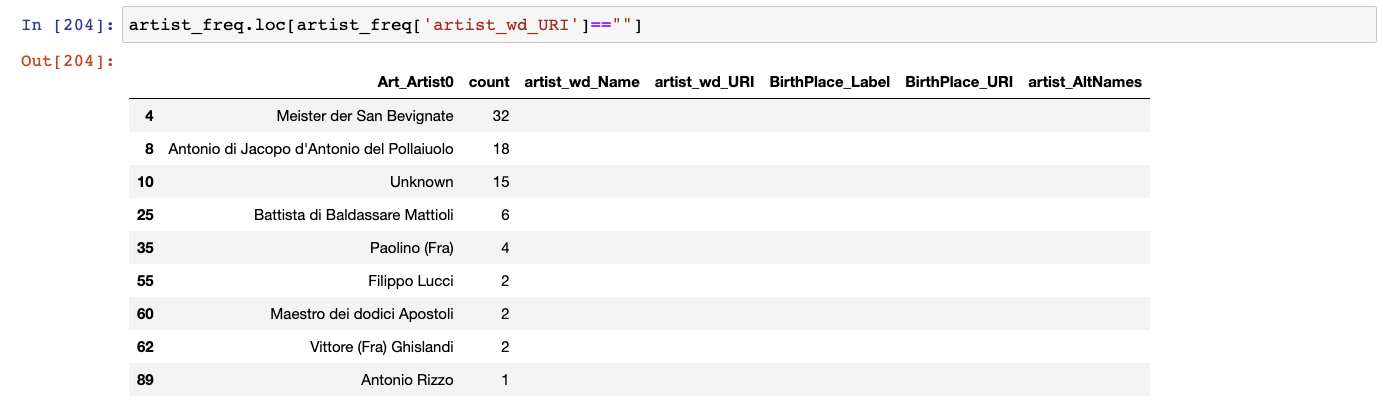

In [24]:
# Normalize artists' names as shown by Wikidata removing commas and placing name before surname when necessary
def remove_comma(artist_Name):
    if ", " in artist_Name:
        artist_split = artist_Name.split(", ")
        artist_Name = artist_split[1] + " " + artist_split[0]
    return artist_Name

In [25]:
# Remove digits and parentheses and other unnecessary elements from artists' names
def remove_el(artist_Name):
    pattern = r'\(\d+?\)'
    artist_Name = re.sub(pattern, '', artist_Name)
    if '(der Ältere)' in artist_Name:
        artist_Name = artist_Name.replace('(der Ältere)', '')
    if '  ' in artist_Name:
        artist_Name = artist_Name.replace('  ', ' ')
    if '(Fra)' in artist_Name:
        artist_Name = artist_Name.replace('(Fra)', 'Fra')
        artist_split = artist_Name.split(" ")
        if len(artist_split) == 2:
            artist_Name = artist_split[1] + " " + artist_split[0]
        if len(artist_split) == 3:
            artist_Name = artist_split[1] + " " + artist_split[0] + " " + artist_split[2]
    if 'Antonio di Jacopo d\'Antonio del Pollaiuolo' in artist_Name:
        artist_Name = artist_Name.replace('Antonio di Jacopo d\'Antonio del Pollaiuolo', 'Antonio del Pollaiuolo')
    if 'Battista di Baldassare Mattioli' in artist_Name:
        artist_Name = artist_Name.replace('Battista di Baldassare Mattioli', 'Mattioli Battista di Baldassarre')
    if 'Antonio Rizzo' in artist_Name:
        artist_Name = artist_Name.replace('Antonio Rizzo', 'Antonello Riccio')
    if 'Maestro dei dodici' in artist_Name:
        artist_Name = artist_Name.replace('Maestro dei dodici', 'Maestro dei Dodici')
    return artist_Name

In [26]:
# Replace all NaN values in the original dataframe with the string "Unknown" to facilitate analysis
df_noscan['Art_Artist0'].fillna(value= "No Data", inplace = True)

# Add column to the initial dataframe with normalized versions of artists'name
df_noscan["Artist_wd_nameprep"] = df_noscan['Art_Artist0'].apply(remove_comma).apply(remove_el)

# 4. Integrating data with SPARQL
***

The previous analysis resulted in the creation of the following dataframes:
 * ```df```: Dataframe containing all photographs records
 * ```df_noscan``` : Dataframe containing all photographs records except records about the digitised version of photographs, which is generally recorded as a standalone photograph, but is not relevant for this analysis
 * ```new_df_buerkel```: Dataframe containing records of all photographs that are part of the Bürkel collection
 The following section aims at integrating data about artists to provide further results about Burkel's photo collection.
 
We can use these dataframes as a starting point to integrate further data from Wikidata. We first need to define a function to **query the Wikidata endpoint**, and create a **string** to be used for the query. Finally, a new dataframe for artists information is initialized.

In [27]:
# Function to query endpoints
def query_endpoint_artist(endpoint_url, SPRQL_query):
    get_endpoint = endpoint_url
    sparql_w = SPARQLWrapper(get_endpoint,agent='alefa_unibo/0.1 alessandra.failla2@studio.unibo.it')
    sparql_w.setQuery(SPRQL_query)
    sparql_w.setReturnFormat(JSON)
    spqrl_w_res = sparql_w.query().convert()
    return spqrl_w_res

In [28]:
# Initialize a new dataframe containing information about artist's frequency
artist_freq = pd.DataFrame(df_noscan["Art_Artist0"].value_counts().reset_index().values,
                           columns=["Art_Artist0", "count"])

# Extend dataframe colums to host additional data to be integrated
artist_freq["artist_wd_Name"], artist_freq["artist_wd_URI"], artist_freq["BirthPlace_Label"],\
artist_freq["BirthPlace_URI"] = ["", "", "", ""]

In [29]:
# Create a string with artists' names to be processed by the SPARQL query in the following section
artistNames_queryStr1 = '|'.join(set(df_noscan["Artist_wd_nameprep"]))

artistNames_queryStr1

"Guido Reni|Ventura Salimbeni|Luca Signorelli|Bartolommeo Neroni|Sandro Botticelli|Andrea Sacchi|Guercino|Jacopo Pontormo|Carlo Francesco Nuvolone|Fra Paolino|Francesco Furini|Baldassare Peruzzi|Sebastiano Ricci|Domenico Piola|Meister der San Bevignate|Lorenzo di Credi|Andrea del Sarto|Francesco Botticini|Andrea Mantegna|Agostino Carracci|Giovanni Battista Gaulli|Nicola Pisano|Canaletto|Matteo Balducci|Giovanni Paolo Pannini|Salvator Rosa|Girolamo Mazzola-Bedoli|Maestro dei Dodici Apostoli|Filippino Lippi|Leonardo da Vinci|Sebastiano Conca|Diamante di Feo|Carlo Saraceni|Giuseppe Caletti|Vittore Carpaccio|Giulio Carpioni|Raffael|Sebastiano del Piombo|Bernardo Strozzi|Giovanni Cariani|Mario Balassi|Piero di Jacopo d'Antonio Benci del Pollaiuolo|Giovanni Antonio Galli|Joseph Highmore|Garofalo|Benozzo Gozzoli|Tizian|Antonio del Pollaiuolo|Francesco Morone|Ippolito Scarsella|Pietro Donzelli|Giulio Cesare Procaccini|Lorenzo Lotto|Rutilio di Lorenzo Manetti|Franciabigio|Luca Cambiaso|Jacopo d

## 4.1 SPARQL Query: Artists' Wikidata Names and URIs
***

Data integration through **SPARQL queries** allows us to obtain additional information on Ludwig von Bürkel's collection. Few information about the artists is included in the dataframe, so we can **integrate new data** by querying the Wikidata endpoint. We use artists' names to query through both Wikidata artists labels and their alternative names to **extract their URIs**, their labels, and thei alternative names as a list.</br>
We then create a **JSON file** from the result and create a dataframe including only the necessary columns.

In [31]:
#First SPARQL query to retrieve artists' URIs and Names to be used for further queries
artist_URI_sparql_query1 = """
SELECT DISTINCT ?artistURI ?artistLabel (GROUP_CONCAT(DISTINCT(?altNames); separator = ", ") AS ?altNames_list)

WHERE 
{
    ?artistURI wdt:P106 wd:Q1028181; #URIs of individuals with occupation: painter
          rdfs:label ?artistLabel .
    FILTER (regex(?artistLabel, \" """+artistNames_queryStr1+""" \") || regex(?altNames, \" """+artistNames_queryStr1+""" \"))
    FILTER(LANG(?artistLabel) = "it").
    OPTIONAL {?artistURI skos:altLabel ?altNames . FILTER(LANG(?altLabel) = "de" || "en" || "it")}.
    
} GROUP BY ?artistURI ?artistLabel
"""


artist_URI_sparql1 = query_endpoint_artist("https://query.wikidata.org/bigdata/namespace/wdq/sparql", artist_URI_sparql_query1)

# A slice of the query result
print(str(artist_URI_sparql1)[:1000])

{'head': {'vars': ['artistURI', 'artistLabel', 'altNames_list']}, 'results': {'bindings': [{'artistURI': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q983275'}, 'artistLabel': {'xml:lang': 'it', 'type': 'literal', 'value': 'Francesco Botticini'}, 'altNames_list': {'type': 'literal', 'value': 'Botticini, Francesco di Giovanni, Botticini, Francesco di Giovanni Botticini, Francesco Di Giovanni Botticini, Francesco di Giovanni di Domenico Botticini, Franceso Botticini, Francesco di Giovanni Botticini, Francesco di Giovanni Botticini, Botticini'}}, {'artistURI': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q41265883'}, 'artistLabel': {'xml:lang': 'it', 'type': 'literal', 'value': 'Raffaello Schiaminossi'}, 'altNames_list': {'type': 'literal', 'value': 'Raffaele Scaminossi, Raffaele Scaminozzi, Raffaele Schiaminossi, Raffaele Sciaminossi, Raffaello Scaminossi, Raffaello Scaminozzi, Raffaello Sciaminossi, Raffaele Scaminossi, Raffaele Scaminozzi, Raffaele Schiaminossi,

In [32]:
# Write json file from the query result with dict format and open it as 
with open('query_artist_URI1.json', 'w') as outfile:
    json.dump(artist_URI_sparql1['results']['bindings'], outfile)
    
query_artist_URI1 = pd.read_json('query_artist_URI1.json')

# Fill empty spots with the string "No Data"
query_artist_URI1.fillna('No Data', inplace=True)

In [33]:
query_1_to_initialize = True

In [34]:
# Unpack json result as pandas dataframe by adding all columns and then dropping the ones that are not necessary
if query_1_to_initialize == True:
    query_artist_URI1[['Artist_URI_Type', 'Artist_URI_value']] = query_artist_URI1.artistURI.apply(pd.Series)
    query_artist_URI1[['Artist_altName_Type', 'Artist_altName_value']] = query_artist_URI1.altNames_list.apply(pd.Series)
    query_artist_URI1[['label_XML','Artist_Label_Type', 'Artist_Label_value']] = query_artist_URI1.artistLabel.apply(pd.Series)
    query_1_to_initialize == False
    
query_artist_URI1.drop(['Artist_URI_Type', 'Artist_altName_Type', 'label_XML','Artist_Label_Type','artistURI', 'altNames_list', 'artistLabel'], axis=1, inplace=True)
a_set1 = set(query_artist_URI1['Artist_Label_value'])

query_artist_URI1['Artist_altName_value'].head(15)

0     Botticini, Francesco di Giovanni, Botticini, F...
1     Raffaele Scaminossi, Raffaele Scaminozzi, Raff...
2                                                      
3     Giorgio, Giorgioni, جورجيونه, da Castelfranco ...
4     d. piola, D. Piola, D.co Piola, Dom.co Piola, ...
5                                                      
6                                    El Pequeño Tiziano
7                   Francesco Saverio Raffaele Altamura
8     Strozi, Strozi prete, Strozi prete genovese, s...
9                                                      
10                                                     
11               Genero di Guercino, Genero dl Guercino
12                       Tiziano Stahly, Tiziano Stahly
13                                                     
14    Raffaele Antonio Calliano, Raffaele Calliano, ...
Name: Artist_altName_value, dtype: object

To facilitate the integration of data related to artists names, we create a new dataframe column with each row containing a list of **all names alternatives** to be iterated later in the analysis.

In [35]:
# Create a copy of the dataframe, fill empty spaces with strings, 
# split the string containing artists' alternative names to create lists
# and convert the label into a list to be added to the altName list
artist_wd_df = query_artist_URI1.copy()
artist_wd_df['Artist_altName_value'].fillna('No Data', inplace=True)
artist_wd_df['Artist_altName_value'] = artist_wd_df['Artist_altName_value'].str.split(", ")
artist_wd_df['Artist_Label_value'] = artist_wd_df['Artist_Label_value'].str.split(", ")


In [36]:
# Merge the columns Artist_altName_value and Artist_Label_value
# into a single list in a new column to facilitate the analysis
artist_wd_df['Full_Artist_altName_value'] = [a+b for a,b in zip(artist_wd_df['Artist_Label_value'],
                                                                artist_wd_df['Artist_altName_value'])]

artist_wd_df.head(10)

,Artist_URI_value,Artist_altName_value,Artist_Label_value,Full_Artist_altName_value
0,http://www.wikidata.org/entity/Q983275,"[Botticini, Francesco di Giovanni, Botticini, ...",[Francesco Botticini],"[Francesco Botticini, Botticini, Francesco di ..."
1,http://www.wikidata.org/entity/Q41265883,"[Raffaele Scaminossi, Raffaele Scaminozzi, Raf...",[Raffaello Schiaminossi],"[Raffaello Schiaminossi, Raffaele Scaminossi, ..."
2,http://www.wikidata.org/entity/Q7282528,[],[Raffaele Postiglione],"[Raffaele Postiglione, ]"
3,http://www.wikidata.org/entity/Q8459,"[Giorgio, Giorgioni, جورجيونه, da Castelfranco...",[Giorgione],"[Giorgione, Giorgio, Giorgioni, جورجيونه, da C..."
4,http://www.wikidata.org/entity/Q1054362,"[d. piola, D. Piola, D.co Piola, Dom.co Piola,...",[Domenico Piola],"[Domenico Piola, d. piola, D. Piola, D.co Piol..."
5,http://www.wikidata.org/entity/Q19802636,[],[Raffaele Leomporri],"[Raffaele Leomporri, ]"
6,http://www.wikidata.org/entity/Q5442066,[El Pequeño Tiziano],[Teodoro Felipe de Liaño],"[Teodoro Felipe de Liaño, El Pequeño Tiziano]"
7,http://www.wikidata.org/entity/Q1085855,[Francesco Saverio Raffaele Altamura],[Francesco Saverio Altamura],"[Francesco Saverio Altamura, Francesco Saverio..."
8,http://www.wikidata.org/entity/Q437724,"[Strozi, Strozi prete, Strozi prete genovese, ...",[Bernardo Strozzi],"[Bernardo Strozzi, Strozi, Strozi prete, Stroz..."
9,http://www.wikidata.org/entity/Q16031076,[],[Raffaele Maccagnani],"[Raffaele Maccagnani, ]"


## 4.2 Use query results to fill the Artists Dataframe

We can now fill some of the empty columns in the ```artist_freq``` dataframe using the data obtained from the query and stored in ```artist_wd_df```:
* Fill the column ```artist_wd_Name``` with data from ```artist_freq['Artist_Label_value']```, which represents artists names
* Fill the column ```artist_wd_URI``` with data from ```artist_freq[Artist_URI_value]```, corresponding to artists URIs
* Fill the column ```artist_AltNames``` with data from ```artist_freq[Artist_altName_value]```, the list of alternative names on Wikidata

In [37]:
# Remove commas, digits or other unnecessary elements from the artist name strings
artist_freq['Art_Artist0'] = artist_freq['Art_Artist0'].apply(remove_comma).apply(remove_el)

In [38]:
# Function to add brackets to the URI column of the dataframe
def add_brackets(el):
    tmp=set()
    if el not in tmp:
        tmp.add(el)
        el = "<"+el+">"
    return el

In [39]:
# Add brackets and show updated results dataframe
if artist_wd_df['Artist_URI_value'][0][0] !='<':
    artist_wd_df['Artist_URI_value'] = artist_wd_df['Artist_URI_value'].apply(add_brackets)
    to_execute_foll_cell=False

artist_wd_df.head()

,Artist_URI_value,Artist_altName_value,Artist_Label_value,Full_Artist_altName_value
0,<http://www.wikidata.org/entity/Q983275>,"[Botticini, Francesco di Giovanni, Botticini, ...",[Francesco Botticini],"[Francesco Botticini, Botticini, Francesco di ..."
1,<http://www.wikidata.org/entity/Q41265883>,"[Raffaele Scaminossi, Raffaele Scaminozzi, Raf...",[Raffaello Schiaminossi],"[Raffaello Schiaminossi, Raffaele Scaminossi, ..."
2,<http://www.wikidata.org/entity/Q7282528>,[],[Raffaele Postiglione],"[Raffaele Postiglione, ]"
3,<http://www.wikidata.org/entity/Q8459>,"[Giorgio, Giorgioni, جورجيونه, da Castelfranco...",[Giorgione],"[Giorgione, Giorgio, Giorgioni, جورجيونه, da C..."
4,<http://www.wikidata.org/entity/Q1054362>,"[d. piola, D. Piola, D.co Piola, Dom.co Piola,...",[Domenico Piola],"[Domenico Piola, d. piola, D. Piola, D.co Piol..."


In [40]:
# If artists name match, fill the dataframe artist_freq with the names and URIs of the artists as shown by Wikidata
for index, row in artist_wd_df.iterrows():
    for name in row['Full_Artist_altName_value']:
        for index1, row1 in artist_freq.iterrows():
            if name == row1['Art_Artist0']:
                row1['artist_wd_Name'] = ''.join(row['Artist_Label_value'])
                row1['artist_wd_URI'] = ''.join(row['Artist_URI_value'])                

# The updated dataframe with artists' information:
artist_freq.head()

,Art_Artist0,count,artist_wd_Name,artist_wd_URI,BirthPlace_Label,BirthPlace_URI
0,Raffael,96,Raffaello Sanzio,<http://www.wikidata.org/entity/Q5597>,,
1,Guercino,91,Guercino,<http://www.wikidata.org/entity/Q334262>,,
2,Jacopo Pontormo,40,Pontormo,<http://www.wikidata.org/entity/Q207929>,,
3,Tizian,39,Tiziano Vecellio,<http://www.wikidata.org/entity/Q47551>,,
4,Meister der San Bevignate,32,,,,


In [41]:
# The following artists were not found on Wikidata
artist_freq.loc[artist_freq['artist_wd_URI']==""]

,Art_Artist0,count,artist_wd_Name,artist_wd_URI,BirthPlace_Label,BirthPlace_URI
4,Meister der San Bevignate,32,,,,
11,No Data,14,,,,
55,Filippo Lucci,2,,,,


This process resulted in a dataframe containing information about **artist names** and their **URIs**. We can use the data in the dataframe to extract more information about artists in the following section.

## 4.3 Second SPARQL Query: birthplace

We can now use the integrated data to add information about **artists' birthplaces**. This allows us to obtain information about the origins of the artists, adding a further feature to the paintings depicted in the collection.</br>
First, we create a string containing artists URIs to be used in the following SPARQL query:

In [42]:
#Create a new string from the dataframe column containing artists' URIs to be used in the following SPARQL query
artist_wd_URI_queryStr = ''.join(set(artist_freq["artist_wd_URI"]))
artist_wd_URI_queryStr[:1000]

'<http://www.wikidata.org/entity/Q334262><http://www.wikidata.org/entity/Q359421><http://www.wikidata.org/entity/Q2625832><http://www.wikidata.org/entity/Q366081><http://www.wikidata.org/entity/Q774781><http://www.wikidata.org/entity/Q6836834><http://www.wikidata.org/entity/Q348024><http://www.wikidata.org/entity/Q966586><http://www.wikidata.org/entity/Q379521><http://www.wikidata.org/entity/Q940454><http://www.wikidata.org/entity/Q5581><http://www.wikidata.org/entity/Q320118><http://www.wikidata.org/entity/Q177213><http://www.wikidata.org/entity/Q1054362><http://www.wikidata.org/entity/Q507279><http://www.wikidata.org/entity/Q8511><http://www.wikidata.org/entity/Q744747><http://www.wikidata.org/entity/Q1440305><http://www.wikidata.org/entity/Q506483><http://www.wikidata.org/entity/Q918859><http://www.wikidata.org/entity/Q280940><http://www.wikidata.org/entity/Q128027><http://www.wikidata.org/entity/Q8459><http://www.wikidata.org/entity/Q2846290><http://www.wikidata.org/entity/Q1603954

We use this string to filter artists through their URIs and retrieve their **place of birth** to be then connected with the **country** of reference. From the result we create a JSON file and initialize a dataframe with all relevant data.

In [43]:
# Initialize a second SPARQL query to retrieve artists' country of birth to be inserted in the dataframe
artist_geo_query_SPARQL = """
SELECT DISTINCT ?artistURI ?country ?countrylabel

WHERE 
{ VALUES ?artistURI {"""+artist_wd_URI_queryStr+"""} 
    ?artistURI wdt:P106 wd:Q1028181;
        wdt:P19 ?place .
    ?place wdt:P17 ?country .
    ?country rdfs:label ?countrylabel .
    FILTER(LANG(?countrylabel) = "en") .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} 
"""

artist_geo_query_SPARQL = query_endpoint_artist("https://query.wikidata.org/bigdata/namespace/wdq/sparql", artist_geo_query_SPARQL)
print(str(artist_geo_query_SPARQL)[:1000])

{'head': {'vars': ['artistURI', 'country', 'countrylabel']}, 'results': {'bindings': [{'artistURI': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q809503'}, 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q38'}, 'countrylabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Italy'}}, {'artistURI': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7770'}, 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q38'}, 'countrylabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Italy'}}, {'artistURI': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7780'}, 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q38'}, 'countrylabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Italy'}}, {'artistURI': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q3108002'}, 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q38'}, 'countrylabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Ita

In [44]:
# Write json file from the query results and open the file
with open('artist_birthplace.json', 'w') as outfile:
    json.dump(artist_geo_query_SPARQL['results']['bindings'], outfile)
    
artist_birthplace = pd.read_json('artist_birthplace.json')

# Fill empty spots with a "No Data" string
artist_birthplace.fillna('No Data', inplace=True)

In [45]:
to_execute_foll_cell2=True

In [46]:
#Unpack the result and add it to new columns of the artist_birthplace dataframe; then drop the unnecessary columns
if to_execute_foll_cell2:
    artist_birthplace[['Artist_URI_Type', 'Artist_URI_value']] = artist_birthplace.artistURI.apply(pd.Series)
    artist_birthplace[['Artist_Birthplace_type', 'Birthplace_URI_value']] = artist_birthplace.country.apply(pd.Series)
    artist_birthplace[['label_XML','Birthplace_Label_type', 'Birthplace_Label_value']] = artist_birthplace.countrylabel.apply(pd.Series)
    to_execute_foll_cell=False
    
artist_birthplace.drop(['Artist_URI_Type', 'Artist_Birthplace_type', 'label_XML','Birthplace_Label_type','artistURI', 'country', 'countrylabel'], axis=1, inplace=True)

#Add brackets and show updated results dataframe
if artist_birthplace['Artist_URI_value'][0][0] !='<':
    artist_birthplace['Artist_URI_value'] = artist_birthplace['Artist_URI_value'].apply(add_brackets)
if artist_birthplace['Birthplace_URI_value'][0][0] !='<':
    artist_birthplace['Birthplace_URI_value'] = artist_birthplace['Birthplace_URI_value'].apply(add_brackets)

artist_birthplace.head()

,Artist_URI_value,Birthplace_URI_value,Birthplace_Label_value
0,<http://www.wikidata.org/entity/Q809503>,<http://www.wikidata.org/entity/Q38>,Italy
1,<http://www.wikidata.org/entity/Q7770>,<http://www.wikidata.org/entity/Q38>,Italy
2,<http://www.wikidata.org/entity/Q7780>,<http://www.wikidata.org/entity/Q38>,Italy
3,<http://www.wikidata.org/entity/Q3108002>,<http://www.wikidata.org/entity/Q38>,Italy
4,<http://www.wikidata.org/entity/Q1707243>,<http://www.wikidata.org/entity/Q145>,United Kingdom


## 4.4 Update the dataframe with birthplace data

In [47]:
#Use the results from the previous query to fill the initial dataframe containing information about artists:
#Check for matching URIs to add artists' country of birth (label and URI)
for index_, row_ in artist_birthplace.iterrows():
    for index1_, row1_ in artist_freq.iterrows():
        if row_['Artist_URI_value'] == row1_['artist_wd_URI']:
            row1_['BirthPlace_Label'] = row_['Birthplace_Label_value']                
            row1_['BirthPlace_URI'] = row_['Birthplace_URI_value']

The artists that were not identified on Wikidata are excluded from the query and cannot be automatically connected to their country of origin. We address this issue manually to complete the information.

In [48]:
# Complete missing artist information
for idx, el in artist_freq.iterrows():
    if (el['Art_Artist0'] != 'No Data') & (el['BirthPlace_Label']==""):
        el['BirthPlace_Label'] = 'Italy'
        el['BirthPlace_URI'] = '<http://www.wikidata.org/entity/Q38>'

In [49]:
# The final URI-related dataframe is shown and saved below
artist_freq.to_csv(path_base+'artists_URI.csv')
artist_freq.head()

,Art_Artist0,count,artist_wd_Name,artist_wd_URI,BirthPlace_Label,BirthPlace_URI
0,Raffael,96,Raffaello Sanzio,<http://www.wikidata.org/entity/Q5597>,Italy,<http://www.wikidata.org/entity/Q38>
1,Guercino,91,Guercino,<http://www.wikidata.org/entity/Q334262>,Italy,<http://www.wikidata.org/entity/Q38>
2,Jacopo Pontormo,40,Pontormo,<http://www.wikidata.org/entity/Q207929>,Italy,<http://www.wikidata.org/entity/Q38>
3,Tizian,39,Tiziano Vecellio,<http://www.wikidata.org/entity/Q47551>,Italy,<http://www.wikidata.org/entity/Q38>
4,Meister der San Bevignate,32,,,Italy,<http://www.wikidata.org/entity/Q38>


In [50]:
# Creation of an updated dataframe containing only photos from the Bürkel collection
new_df_buerkel = df_noscan.loc[df_noscan['Photo_Provenance'] =='Buerkel, Ludwig von']
new_df_buerkel.to_csv(path_base + "dataframe_buerkel_photos.csv")

# 5. Data visualization: Addressing research questions
***

The preceding analysis has provided the essential data required to effectively address the research questions central to this project. The primary objective of this project is to **assess the impact of Ludwig von Bürkel's collection on the overall collection of the KHI** and **determine the categories on which the collection had a relevant impact**. This section aims to address multiple inquiries using the analysis data to give an provide a summary of the findings and offer insights into the main research question.

## 5.1 Assess the impact of Ludwig von Bürkel's collection

This section addresses the following research questions:
* Are there **objects of particular interest** that Bürkel contributed to document?
* Did the acquisition in 1912 **expand the KHI collection** with photos of artworks that were not featured in the archive yet? 
* How many **unique photographs** of paintings are entailed in Bürkel's collection?
* How are **destroyed and missing paintings** from Bürkel's photo collections represented in the KHI archive? What was Bürkel's contribution?

### 5.1.1 Are there objects of particular interest that Bürkel has contributed to document?

We retrieve the number of photographs for each object to observe if some artworks are **highly represented** in the collection of the KHI.</br>
Compare their **acquisition dates** to verify at what point Bürkel’s photos were acquired by the archive.

In [114]:
# Initialization of a dataframe containing photos in chronological order according to their archival date.
# We limit the visualization to paintings represented in at least 5 photographs.
df_for_relevance=df_noscan.copy()
df_for_relevance.sort_values(by=['Photo_ArchivalDate'], inplace=True)
df_for_relevance.reset_index(inplace=True, drop=True)
df_paint_count= pd.DataFrame(df_for_relevance['Art_id0'].value_counts())
selected_paintings = list(df_paint_count.loc[df_paint_count['Art_id0'] > 4].index)
df_for_relevance = df_for_relevance.loc[df_for_relevance['Art_id0'].isin(selected_paintings)].reset_index(drop= True)

In [115]:
# List of information about paintings to be included in the chart
englist=[('Szenen zum Alten Testament', 'Scenes from the Old Testament', 'Raffael', '07503992'),
 ('Allegorien der Tageszeiten', 'Allegory of the times of the day', 'Guercino', '07503029'),
 ('Schlafende Venus', 'Sleeping Venus', 'Giorgione', '07701001'),
 ('Der heilige Hieronymus im Studierzimmer', 'Saint Jerome in His Study',
  'A. da Messina',
  '07770005'),
 ('Gemälde aus dem Palazzo dei Camerlenghi', 'Paintings from Palazzo dei Camerlenghi', 'B. Veronese', '07702726'),
 ('Innendekoration von San Bevignate in Perugia', 'Interior decorations of San Bevignate',
  'M. der San Bevignate',
  '07650449'),
 ('Felsgrottenmadonna', 'Virgin of the Rocks', 'L. da Vinci', '70013139'),
 ('Schlafzimmerausstattung mit Themen der römischen Geschichte', 'Mythological episodes and Roman history',
  'D. Beccafumi',
  '07500795'),
 ('Madonna des heiligen Franziskus', 'Madonna of Saint Francis', 'Correggio', '70013049'),
 ('Szenen aus dem Marienleben', 'Scenes from the Life of the Virgin Mary', 'B. Peruzzi', '70010547'),
 ('Christus und die Ehebrecherin', 'Christ and the Woman Taken in Adultery', 'Tizian', '07700924'),
 ('Prozessionstafel', 'Processional table',
  'B. Mattioli',
  '70013343'),
 ('Malerische Ausstattung', 'Interior decorations', 'J. Pontormo', '07703777'),
 ('Kalvarienberg', 'Mount Calvary', 'No Data', '07503386'),
 ('Sibilla Samia', 'Sibilla Samia','Guercino', '07502924'),
 ('Abraham verstößt Hagar und Ismael', 'Abraham Casting out Hagar and Ishmael', 'Guercino', '07500419'),
 ('Maria, Johannes Evangelista und der heilige Nikolaus (Augustinus?) beten das Christuskind an', 'Mary, John Ev. and St. Nicholas',
  'Perugino',
  '07703521'),
 ('Heilige Familie mit Heiligen', 'Holy family with saints', 'V. Carpaccio', '07700658'),
 ('Bildnis einer Dame in Weiß', 'Portrait of a lady in white','Tizian', '07703022'),
 ('Seitentafeln mit Heiligem Augustinus und Schmerzensmutter', 'Side panels with St. Augustine and Mother of Sorrows',
  'F. Botticini',
  '70013075'),
 ('Die Madonna des heiligen Georg', 'Madonna of St. George', 'Correggio', '70013050'),
 ('Ein Edelmann und ein Poet in der Pose der Melancholia', 'A nobleman in the pose of melancholia',
  'A. Moretto',
  '70005381'),
 ('Maria mit dem Kind und den heiligen Katharina und Jakobus der Ältere', 'Mary with the Child and Saints Catherine and James',
  'L. Lotto',
  '70013046'),
 ('Szenen aus den Taten des Herkules: Herkules kämpft mit der Hydra, Herkules und Antaeus', 'Scenes from the deeds of Hercules',
  "A. Pollaiuolo",
  '70013120'),
 ('Mädchen im Pelz', 'Girl in a fur', 'Tizian', '70013036'),
 ('Krönung Mariens mit den Heiligen Fina, Augustinus, Bartholus, Gimignano, Hieronymus und Nikolaus von Tolentino', 'Coronation of Mary with Saints',
  "P. Pollaiuolo",
  '07770246'),
 ('Freskenzyklus', 'Fresco cycle', 'S. del Piombo', '07700713'),
 ('Die Verklärung der heiligen Cäcilia', 'The Transfiguration of St. Cecilia','S. Conca', '70013110'),
 ('Maria mit Kind, Heiligen und dem seligen Colombini', 'Mary with child, saints and Giovanni Colombini',
  'S. di Pietro',
  '07505542'),
 ('Malerische Ausstattung', 'Interior decoration','A. Bronzino', '07703777')]

In [116]:
# Initialization of a dataframe with the final data to be included in the chart.
df_for_relevance['Eng_title']=""
df_for_relevance['Abbr_Artist']=""
for idx, el in df_for_relevance.iterrows():
    for tup_el in englist:
        if el['Art_id0'] == tup_el[-1]:
            df_for_relevance.loc[idx, 'Eng_title'] = tup_el[1]
        if el['Art_id0'] == tup_el[-1]:
            df_for_relevance.loc[idx, 'Abbr_Artist'] = tup_el[2]

The following chart shows an overview of paintings featured in **at least five photos** from the archive. It provides information about the number of photographs, represented through the small rectangles, placed in **chronological order** of archival date from left to right. Photographs are grouped into three categories as specified in the legend:
* Photos acquired by the Photothek **before** the Bürkel collection
* Photos from the Bürkel collection, acquired in **1912**
* Photos acquired by the archive **after** the Bürkel collection

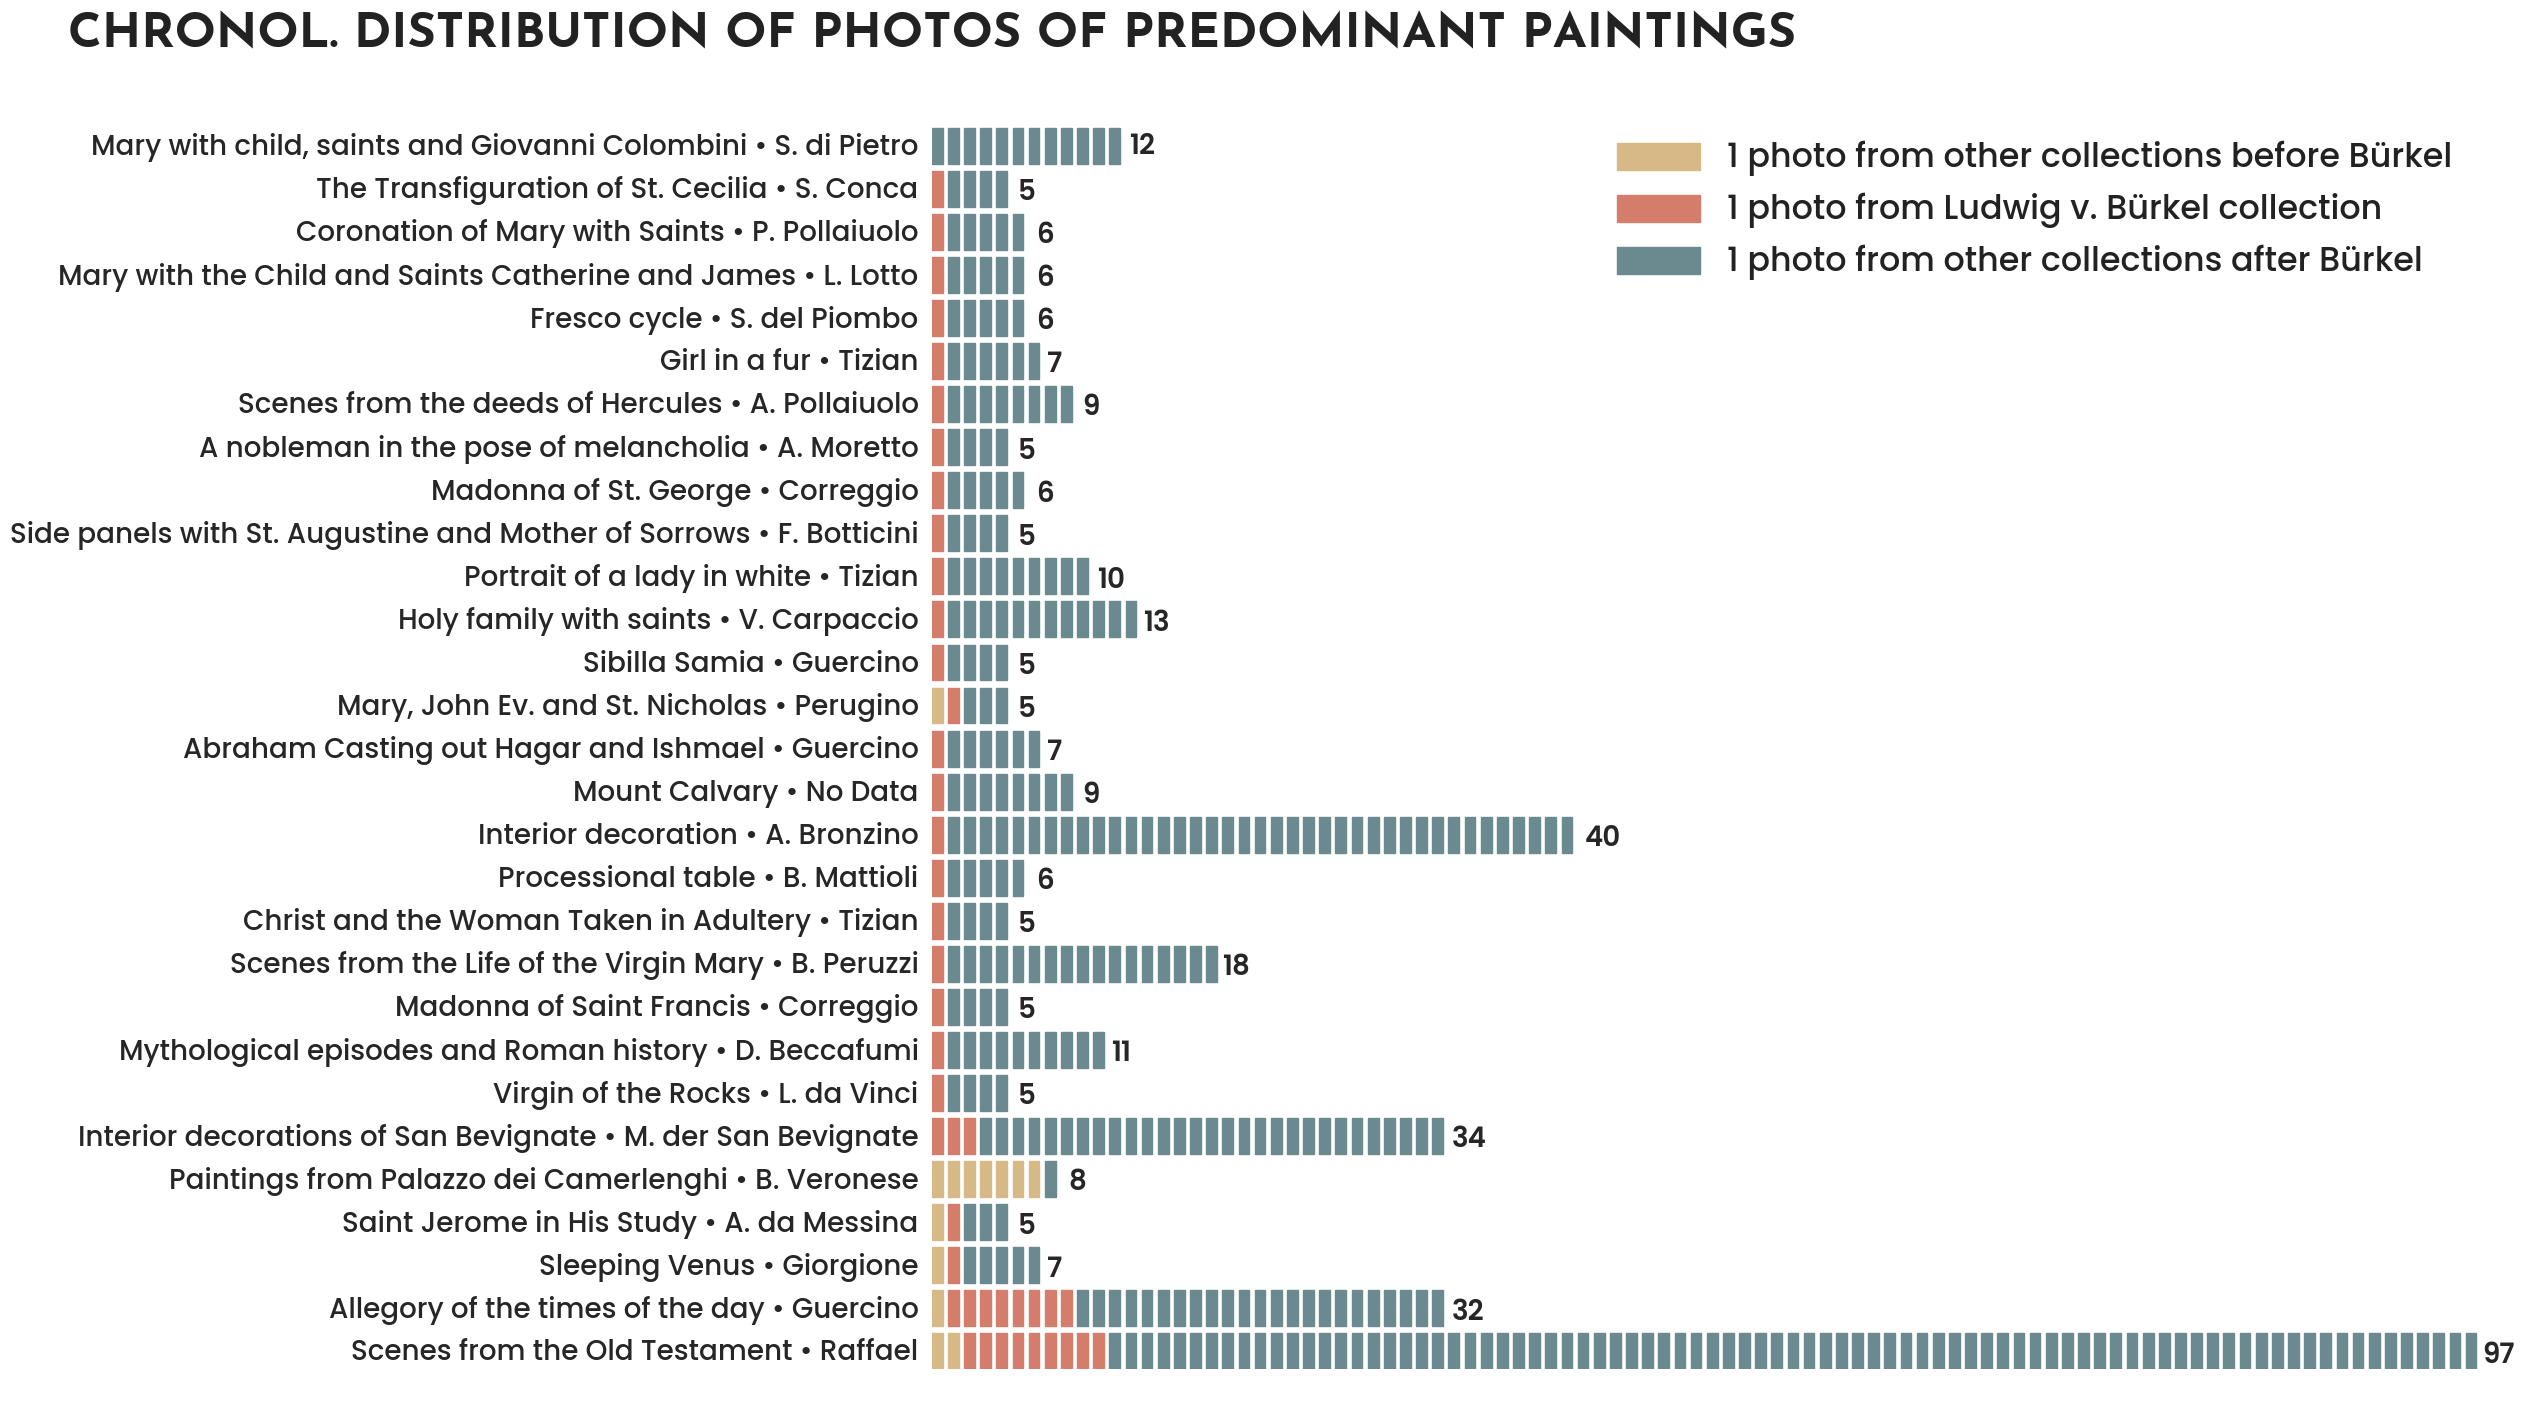

In [117]:
# Initialization of all variables required to create the graph
paint_relev_dict={}
max_x = 0
wdth_y = 10
max_y = -wdth_y*1.2
wdth_x = 3
ticks=[]
ydic={}
xdic={}
fig, ax = plt.subplots(figsize = (20,20))


# Creation of a dictionary containing artworks IDs as keys, used to position paintings on the y-axis
# through an iteration on the dataframe, photographs are placed on the chart based on the position of the previous 
# photo (allowing to follow the chronological order).
# Three different colors are assigned to the photographs according to the date of archival.
# All collected data is used to place small rectangles, each one representing a photo.
for idx, value in df_for_relevance.iterrows():
    if value['Art_id0'] not in paint_relev_dict.keys():
        ypos = max_y + wdth_y*1.2
        xpos = 0
        tick = ypos+wdth_y/6
        ticks.append(tick)
        ydic[tick] = str(value['Eng_title']+' • '+value['Abbr_Artist'])
    else:
        ypos = paint_relev_dict[value['Art_id0']][1]
        xpos = paint_relev_dict[value['Art_id0']][0]+wdth_x*1.5
    if max_x < xpos:
        max_x = xpos
    if max_y < ypos:
        max_y = ypos 
    paint_relev_dict[value['Art_id0']] = (xpos,ypos)
    if int(value['Photo_ArchivalDate']) == 1912:
        if value['Photo_Provenance']=='Buerkel, Ludwig von':
            c = '#D57D6B'
        else:
            c = '#D6B987'
    else:
        if value['Photo_Provenance']=='Buerkel, Ludwig von':
            c = '#D57D6B'
        else:
            if int(value['Photo_ArchivalDate']) < 1912:
                c = '#D6B987'
            else:
                c = '#6A8A90'
    ax.add_patch(Rectangle((xpos,ypos), wdth_x, wdth_y, color = c))

plt.xlim((0,max_x+wdth_x*1.5))
plt.ylim((0,max_y+wdth_y*1.5))

# Add font properties
font_path = '/Users/alessandrafailla/Library/Fonts/JosefinSans-Bold.ttf' #path_base!
font_path1 = '/Users/alessandrafailla/Library/Fonts/Poppins-Semibold.ttf'
font_path2 = '/Users/alessandrafailla/Library/Fonts/Poppins-Medium.ttf'
prop = fm.FontProperties(fname=font_path, size=35)
prop1 = fm.FontProperties(fname=font_path1, size=22)
prop2 = fm.FontProperties(fname=font_path2, size=20)
prop3 = fm.FontProperties(fname=font_path2, size=24)
prop4 = fm.FontProperties(fname=font_path1, size=20)

# Edit chart details
ax.set_aspect('equal', 'box')
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_facecolor("white")
ax.set_yticks(ticks)
xtcks=(0, 65, 132, 200, 265, 332, 400)
ax.set_xticks(xtcks)
ylabels = [ydic.get(t, ticks[i]) for i,t in enumerate(ticks)]
ylabels_new = [label.replace(label, label+'\n') for label in ylabels]
ax.set_yticklabels(ylabels_new ,fontproperties=prop2)
xlabels=('')
ax.set_xticklabels(xlabels, fontproperties=prop1, color='#222222')
ax.set_title('CHRONOL. DISTRIBUTION OF PHOTOS OF PREDOMINANT PAINTINGS',fontproperties=prop, color='#222222',x=0,pad=45)
yellow_patch = mpatches.Patch(color='#D6B987', label='1 photo from other collections before Bürkel')
red_patch = mpatches.Patch(color='#D57D6B', label='1 photo from Ludwig v. Bürkel collection')
blue_patch = mpatches.Patch(color='#6A8A90', label='1 photo from other collections after Bürkel')
legend=ax.legend(handles=[yellow_patch, red_patch, blue_patch], prop=prop3, handlelength=2.5, loc ='upper right',frameon=False, labelcolor='#222222')
ax.tick_params(axis='y', color='None')

for patch in legend.get_patches():
    patch.set_height(20)
    patch.set_y(-3)

plt.text(55,339,'12', fontproperties=prop4)
plt.text(24,326,'5', fontproperties=prop4)
plt.text(29,314,'6', fontproperties=prop4)
plt.text(29,302,'6', fontproperties=prop4)
plt.text(29,290,'6', fontproperties=prop4)
plt.text(32,278,'7', fontproperties=prop4)
plt.text(42,266,'9', fontproperties=prop4)
plt.text(24,254,'5', fontproperties=prop4)
plt.text(29,242,'6', fontproperties=prop4)
plt.text(24,230,'5', fontproperties=prop4)
plt.text(46,218,'10', fontproperties=prop4)
plt.text(59,206,'13', fontproperties=prop4)
plt.text(24,194,'5', fontproperties=prop4)
plt.text(24,182,'5', fontproperties=prop4)
plt.text(32,170,'7', fontproperties=prop4)
plt.text(42,158,'9', fontproperties=prop4)
plt.text(182,146,'40', fontproperties=prop4)
plt.text(29,134,'6', fontproperties=prop4)
plt.text(24,122,'5', fontproperties=prop4)
plt.text(81,110,'18', fontproperties=prop4)
plt.text(24,98,'5', fontproperties=prop4)
plt.text(50,86,'11', fontproperties=prop4)
plt.text(24,74,'5', fontproperties=prop4)
plt.text(145,62,'34', fontproperties=prop4)
plt.text(38,50,'8', fontproperties=prop4)
plt.text(24,38,'5', fontproperties=prop4)
plt.text(32,26,'7', fontproperties=prop4)
plt.text(145,14,'32', fontproperties=prop4)
plt.text(432,2,'97', fontproperties=prop4)


plt.savefig("year_distribution_photos.png", 
                    format='png',dpi=150, bbox_inches = 'tight') #path_base

# Display plot
plt.show()

It is noteworthy that the **initial photographs** of most listed paintings primarily **originated from Ludwig von Bürkel's collection**, indicating his collection's significant contribution to the archive. As shown in the graph, several new photographs of these paintings were acquired after the acquisition of the art historian's collection.

It is crucial to remark that certain bars in the graph lack evidence of the existence of photographs from the Bürkel collection. This discrepancy is due to the **extraction criterias** outlined at the beginning of section 2. The limited number of photographs located at level 4 or below were **excluded from the analysis**, resulting in the absence of red rectangles representing photographs from the Bürkel collection. However, it is important to remember that in these cases, the photographs from the Bürkel collection would fall between the photos marked in yellow and those marked in green.

### 5.1.2 Did the acquisition expand the KHI collection with photos of artworks that were not featured in the archive yet?

Ludwig von Bürkel's collection was donated in **1912** to the Kunsthistorisches Institut in Florenz, founded in **1898**. Today, only a part of Bürkel's collection is available and can be used to provide insights about the history of the development of the institute collections.

To determine the significance of this collection in the archive, we can assess the **uniqueness** of the Bürkel photographs that have been added to the KHI collection. One way to do this is by comparing their **archival date** with that of other photos in the archive that depict the same paintings. This can provide insight into the contribution that the Bürkel photographs make to the archive's overall content.

In [118]:
# Initialize a function to create a bar chart using matplotlib; the input log is a Boolean that determines
# wether the graph is computed on a linear or logarithmic scale.
def plot_bar_1(xlabel, data_df, log):
    plt.figure(figsize=(20,10))
    sns.set()
    p_lot = sns.countplot(x=xlabel, data=data_df, orient='v')
    a=p_lot.set_xticklabels(p_lot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(label='YEAR DISTRIBUTION OF ACQUIRED PHOTOS FROM THE ANALYZED COLLECTIONS',size=24, weight=700, pad=16)
    prop_2 = fm.FontProperties(fname=font_path2)
    _=plt.xticks(weight=500,rotation=45, size=13, fontproperties=prop_2)
    font_path = '/Users/alessandrafailla/Library/Fonts/JosefinSans-Bold.ttf' #path_base!
    fm.fontManager.addfont(font_path)
    prop = fm.FontProperties(fname=font_path)
    ax.set_facecolor("white")
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = prop.get_name()
    if not log:
        p_lot.set_yscale("log")

Dropdown(description='Scale', index=1, options=('Log Scale', 'Linear Scale'), value='Linear Scale')

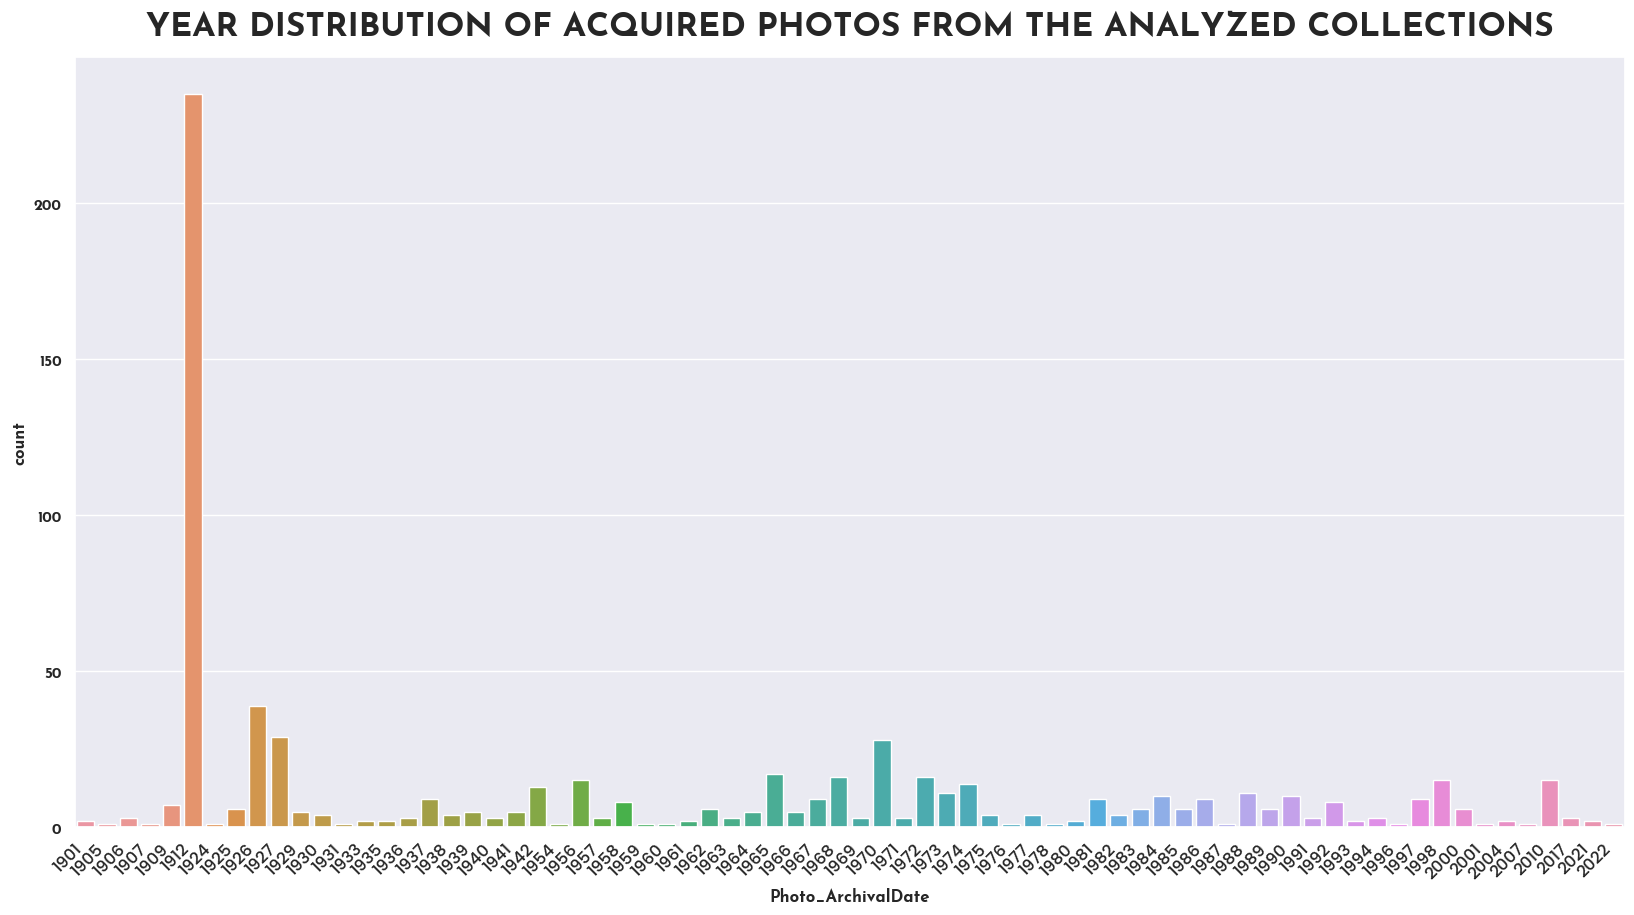

In [119]:
# Initialize a widget to show the chart using both a linear and a logarithmic scale
dwbox = widgets.Dropdown(
    options=["Log Scale", "Linear Scale"],
    value="Linear Scale",
    description='Scale',
    disabled=False)

plot_bar_1('Photo_ArchivalDate',df_noscan, True)

def dropdown_year_eventhandler(change):
    if (change.new == 'Linear Scale'):
        clear_output()
        display(dwbox)
        plot_bar_1('Photo_ArchivalDate',df_noscan, True)
    else:
        clear_output()
        display(dwbox)
        plot_bar_1('Photo_ArchivalDate',df_noscan, False)

dwbox.observe(dropdown_year_eventhandler, names='value')

display(dwbox)

The photos acquired in 1912 were obviously several, since 1912 is the year of the acquisition of Bürkel's collection. We can grasp a better understanding of the photos that entered the archive before and after 1912 by grouping the years into three time spans: **before, during and after 1912**. This information can be easily shown in the following **stacked row chart**:

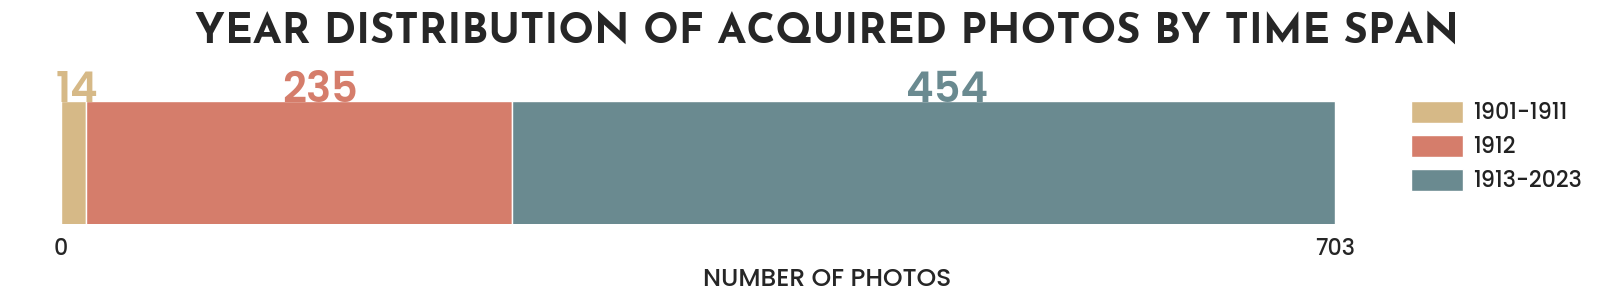

In [120]:
# New dataframe containing photos archival dates divided in three groups: before, during, and after 1912
new_photo_dates=pd.DataFrame()

new_photo_dates['Ph_year'] =df_noscan['Photo_ArchivalDate'].astype(int)

new_photo_dates['Ph_year'].loc[new_photo_dates['Ph_year']<1912] = '1901-1911'

# Provide a label for each time span
for idx, el in new_photo_dates.iterrows():
    if isinstance(el['Ph_year'], int):
        if el['Ph_year']>1912:
            el['Ph_year']= '1913-2023'
    if el['Ph_year']==1912:
        el['Ph_year']='1912'

# Prepare the data to be included in the graph
years = ' '
period1 = new_photo_dates['Ph_year'].value_counts().index[2]  # Number of photos acquired in period 1
period2 = new_photo_dates['Ph_year'].value_counts().index[1]  # Number of photos acquired in period 2
period3 = new_photo_dates['Ph_year'].value_counts().index[0]  # Number of photos acquired in period 3

fig, ax = plt.subplots(figsize=(20,2))

# Initialize three horizontal bars corresponding to the number of photos for each timespan
ax.barh(years, new_photo_dates['Ph_year'].value_counts().values[2],
        label='1901-1911', color='#D6B987')
ax.barh(years, new_photo_dates['Ph_year'].value_counts().values[1],
        left=new_photo_dates['Ph_year'].value_counts().values[2],
        label='1912', color='#D57D6B')
ax.barh(years, new_photo_dates['Ph_year'].value_counts().values[0],
        left=np.add(new_photo_dates['Ph_year'].value_counts().values[1],
                    new_photo_dates['Ph_year'].value_counts().values[2]),
        label='1913-2023', color='#6A8A90')

# Define font properties
prop3 = fm.FontProperties(fname=font_path2, size=18)
prop4 = fm.FontProperties(fname=font_path2, size=16)
prop_annotat = fm.FontProperties(fname=font_path1, size=30)

# Set aspect details
ax.set_xlabel('NUMBER OF PHOTOS', fontproperties=prop3)
ax.set_ylabel(' ')
nn=new_photo_dates['Ph_year'].value_counts().values
nn=nn[::-1]
c=sum(nn[0:3])
xt=[0, c]
plt.xticks(xt,fontproperties=prop3, size=16)
prop_1 = fm.FontProperties(fname=font_path, size=30)
ax.set_title('YEAR DISTRIBUTION OF ACQUIRED PHOTOS BY TIME SPAN', pad=20, fontproperties=prop_1)
ax.set_facecolor("white")
legend=ax.legend(prop=prop4, loc ='center right', frameon=False, labelcolor='#222222')
plt.xlim(-5,850)

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

prev = 0
for p in ax.patches:
    perc = int(p.get_width()) #the label for the bar
    x = int(p.get_width()) + prev
    prev = x 
    y = p.get_y() + p.get_height() / 2
    if prev == 14:
        ax.annotate(perc, (x-int(p.get_width()/2)-10, y+0.4), color="#D6B987", fontproperties=prop_annotat)
    if prev == 249:
        ax.annotate(perc, (x-int(p.get_width()/2)-10, y+0.4), color="#D57D6B", fontproperties=prop_annotat)
    if prev == 703:
        ax.annotate(perc, (x-int(p.get_width()/2)-10, y+0.4), color="#6A8A90", fontproperties=prop_annotat)
        
plt.ylim(0,y+0.5)
    
for patch in legend.get_patches():
    patch.set_height(16)
    patch.set_y(-3)
    
for patch in legend.get_patches():
    patch.set_width(38)

# Save figure
plt.savefig("year_distribution_photos.png", #path_base
                    format='png',dpi=150, bbox_inches = 'tight')    
    
plt.show()

The analysis of the chart reveals that among the 708 photographs analyzed, the **vast majority** depicting the same paintings present in the Bürkel collection were **obtained following the 1912 acquisition** of the collection. Prior to this acquisition, only 14 photographs of these artworks were available in the archive. The substantial increase in the number of photographs obtained after that date highlights the value and **relevance of the artworks** included in Bürkel's collection.

### 5.1.3 How many unique photographs of a painting are entailed in Bürkel's collection?

An additional factor that highlights the significance of Bürkel's collection within the archive is the **number of paintings exclusive to his collection**, which are **represented in only one photo in the archive**. By analyzing this criterion, we can identify the paintings that are unique to Bürkel's collection and have no other photographic representation within the archive. This specific indicator provides valuable insights into the distinctiveness and individuality of Bürkel's collection in relation to the overall archive.

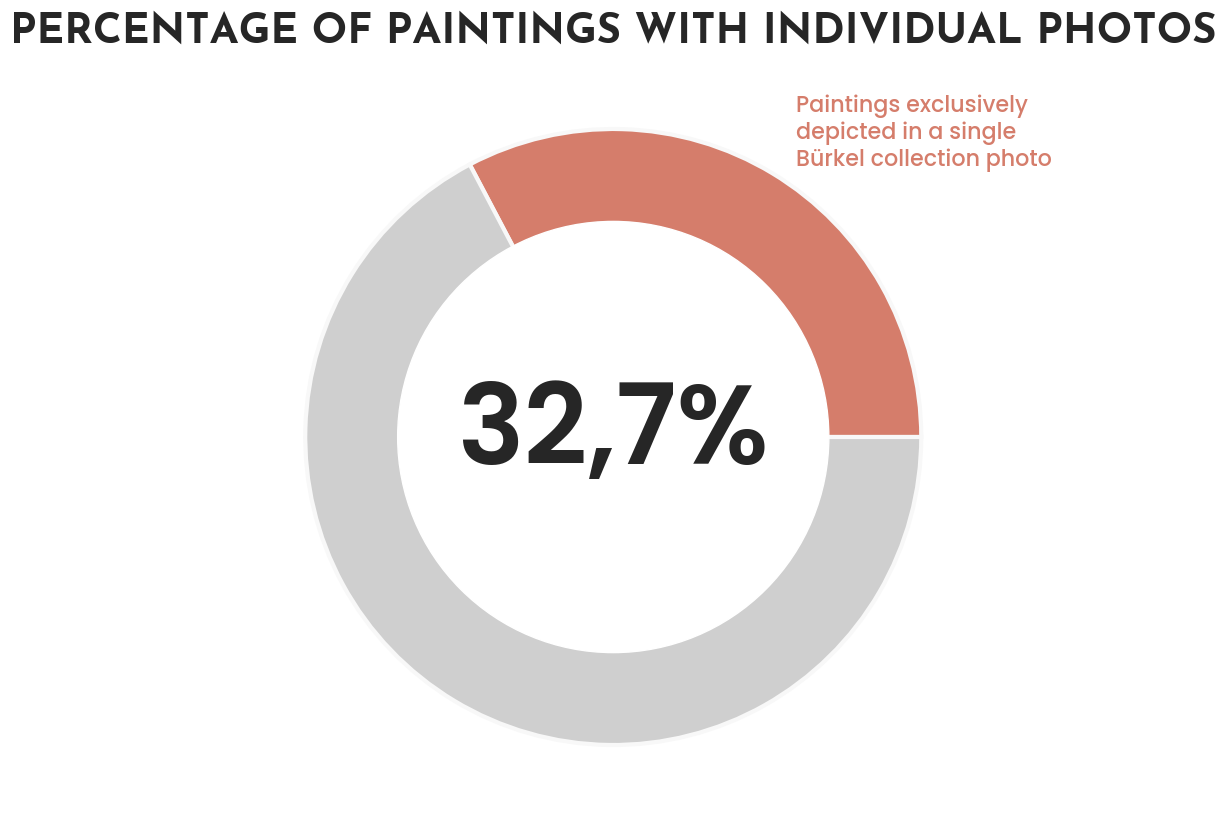

In [121]:
# Identify paintings in the dataframe that are depicted in only one photo from the Bürkel collection
df_count_painting=df_noscan.groupby(by='Art_id0').count()
photos_unique=df_count_painting.loc[df_count_painting['id']==1].index
unique_ph_buerkel=df_noscan.loc[(df_noscan['Art_id0'].isin(photos_unique)) & (df_noscan['Photo_Provenance']=='Buerkel, Ludwig von')]

# Define the data to be shown in the chart
data = [len(unique_ph_buerkel),len(df_count_painting)]
fig, ax = plt.subplots(figsize=(10,10))

# Define Seaborn color palette to use
colors = ['#D57D6B','#cfcfcf']

# Define font properties
font_path = '/Users/alessandrafailla/Library/Fonts/JosefinSans-Bold.ttf' #path_base
font_path1 = '/Users/alessandrafailla/Library/Fonts/Poppins-Semibold.ttf'
font_path2 = '/Users/alessandrafailla/Library/Fonts/Poppins-Medium.ttf'
font_path3 = '/Users/alessandrafailla/Library/Fonts/Poppins-SemiBold.ttf'
property_pie = fm.FontProperties(fname=font_path2, size=16)
property_pie1 = fm.FontProperties(fname=font_path, size=30)
property_pie2 = fm.FontProperties(fname=font_path3, size=20)
property_pie3 = fm.FontProperties(fname=font_path3, size=80)

# Create pie chart
patches, texts, pcts=plt.pie(data,autopct=lambda pct: "{:1.1f}%".format(pct), labels = 
                             ['Paintings exclusively\ndepicted in a single\nBürkel collection photo',
                              ''], 
                             labeldistance=1.15,
                             wedgeprops={'linewidth': 3.0, 'edgecolor': '#f8f8f8'},
                             colors = colors)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

    
# Set chart details
ax.set_title("PERCENTAGE OF PAINTINGS WITH INDIVIDUAL PHOTOS", fontproperties=property_pie1)
plt.setp(pcts, color='white', fontweight='bold',fontproperties=property_pie2)
plt.setp(texts,fontproperties=property_pie)

ax.text(0.5, 0.5, '32,7%', transform = ax.transAxes, va = 'center', ha = 'center', fontproperties=property_pie3)

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

    
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
    
# Save figure
plt.savefig("piechart.png",
                    format='png',dpi=150, bbox_inches = 'tight') #path_base

plt.show()

The analysis of the chart reveals an interesting observation: approximately **one third of the paintings** present in the Bürkel collection are **not represented in any other photograph within the archive**. This means that the photographs from Bürkel's collection serve as the sole testament to these specific paintings within the Photothek. They hold exclusive documentation of these artworks, highlighting the unique and valuable contribution of Bürkel's photographs in **preserving the visual record of these paintings**.

### 5.1.4 How are destroyed and missing paintings from Bürkel's photo collection represented in the KHI archive? What was Bürkel's contribution?

Within the Photothek, numerous photographs depict **artworks that no longer exist**. The database includes relevant information regarding the condition of these artworks, allowing for the identification of **missing, damaged, or destroyed pieces**. By extracting data from the dataframe, we can compile an overview of the paintings within the Bürkel collection that are currently unavailable, providing insight on the artworks that have been lost or no longer exist today.

In [122]:
# Identify paintings in the dataframe that were destroyed or are currently missing
painting_state_all=df_noscan.loc[
    df_noscan['Art_ActualState0'].isin
     (['zerstört', 'verschollen']),['Art_id0','Art_Artist0', 'Art_title0','Art_ActualState0', ]].copy()

painting_state_all.head()

,Art_id0,Art_Artist0,Art_title0,Art_ActualState0
14,70012991,Guercino,Semiramis und der Bote,zerstört
52,70013022,Guercino,Die heilige Theresia mit den heiligen Albert v...,zerstört
198,70013013,"Dossi, Dosso",Disputation der Immaculata Conceptio mit den h...,zerstört
398,70012999,Guercino,Diana,verschollen
610,70012996,Guercino,Der Tod des Adonis,zerstört


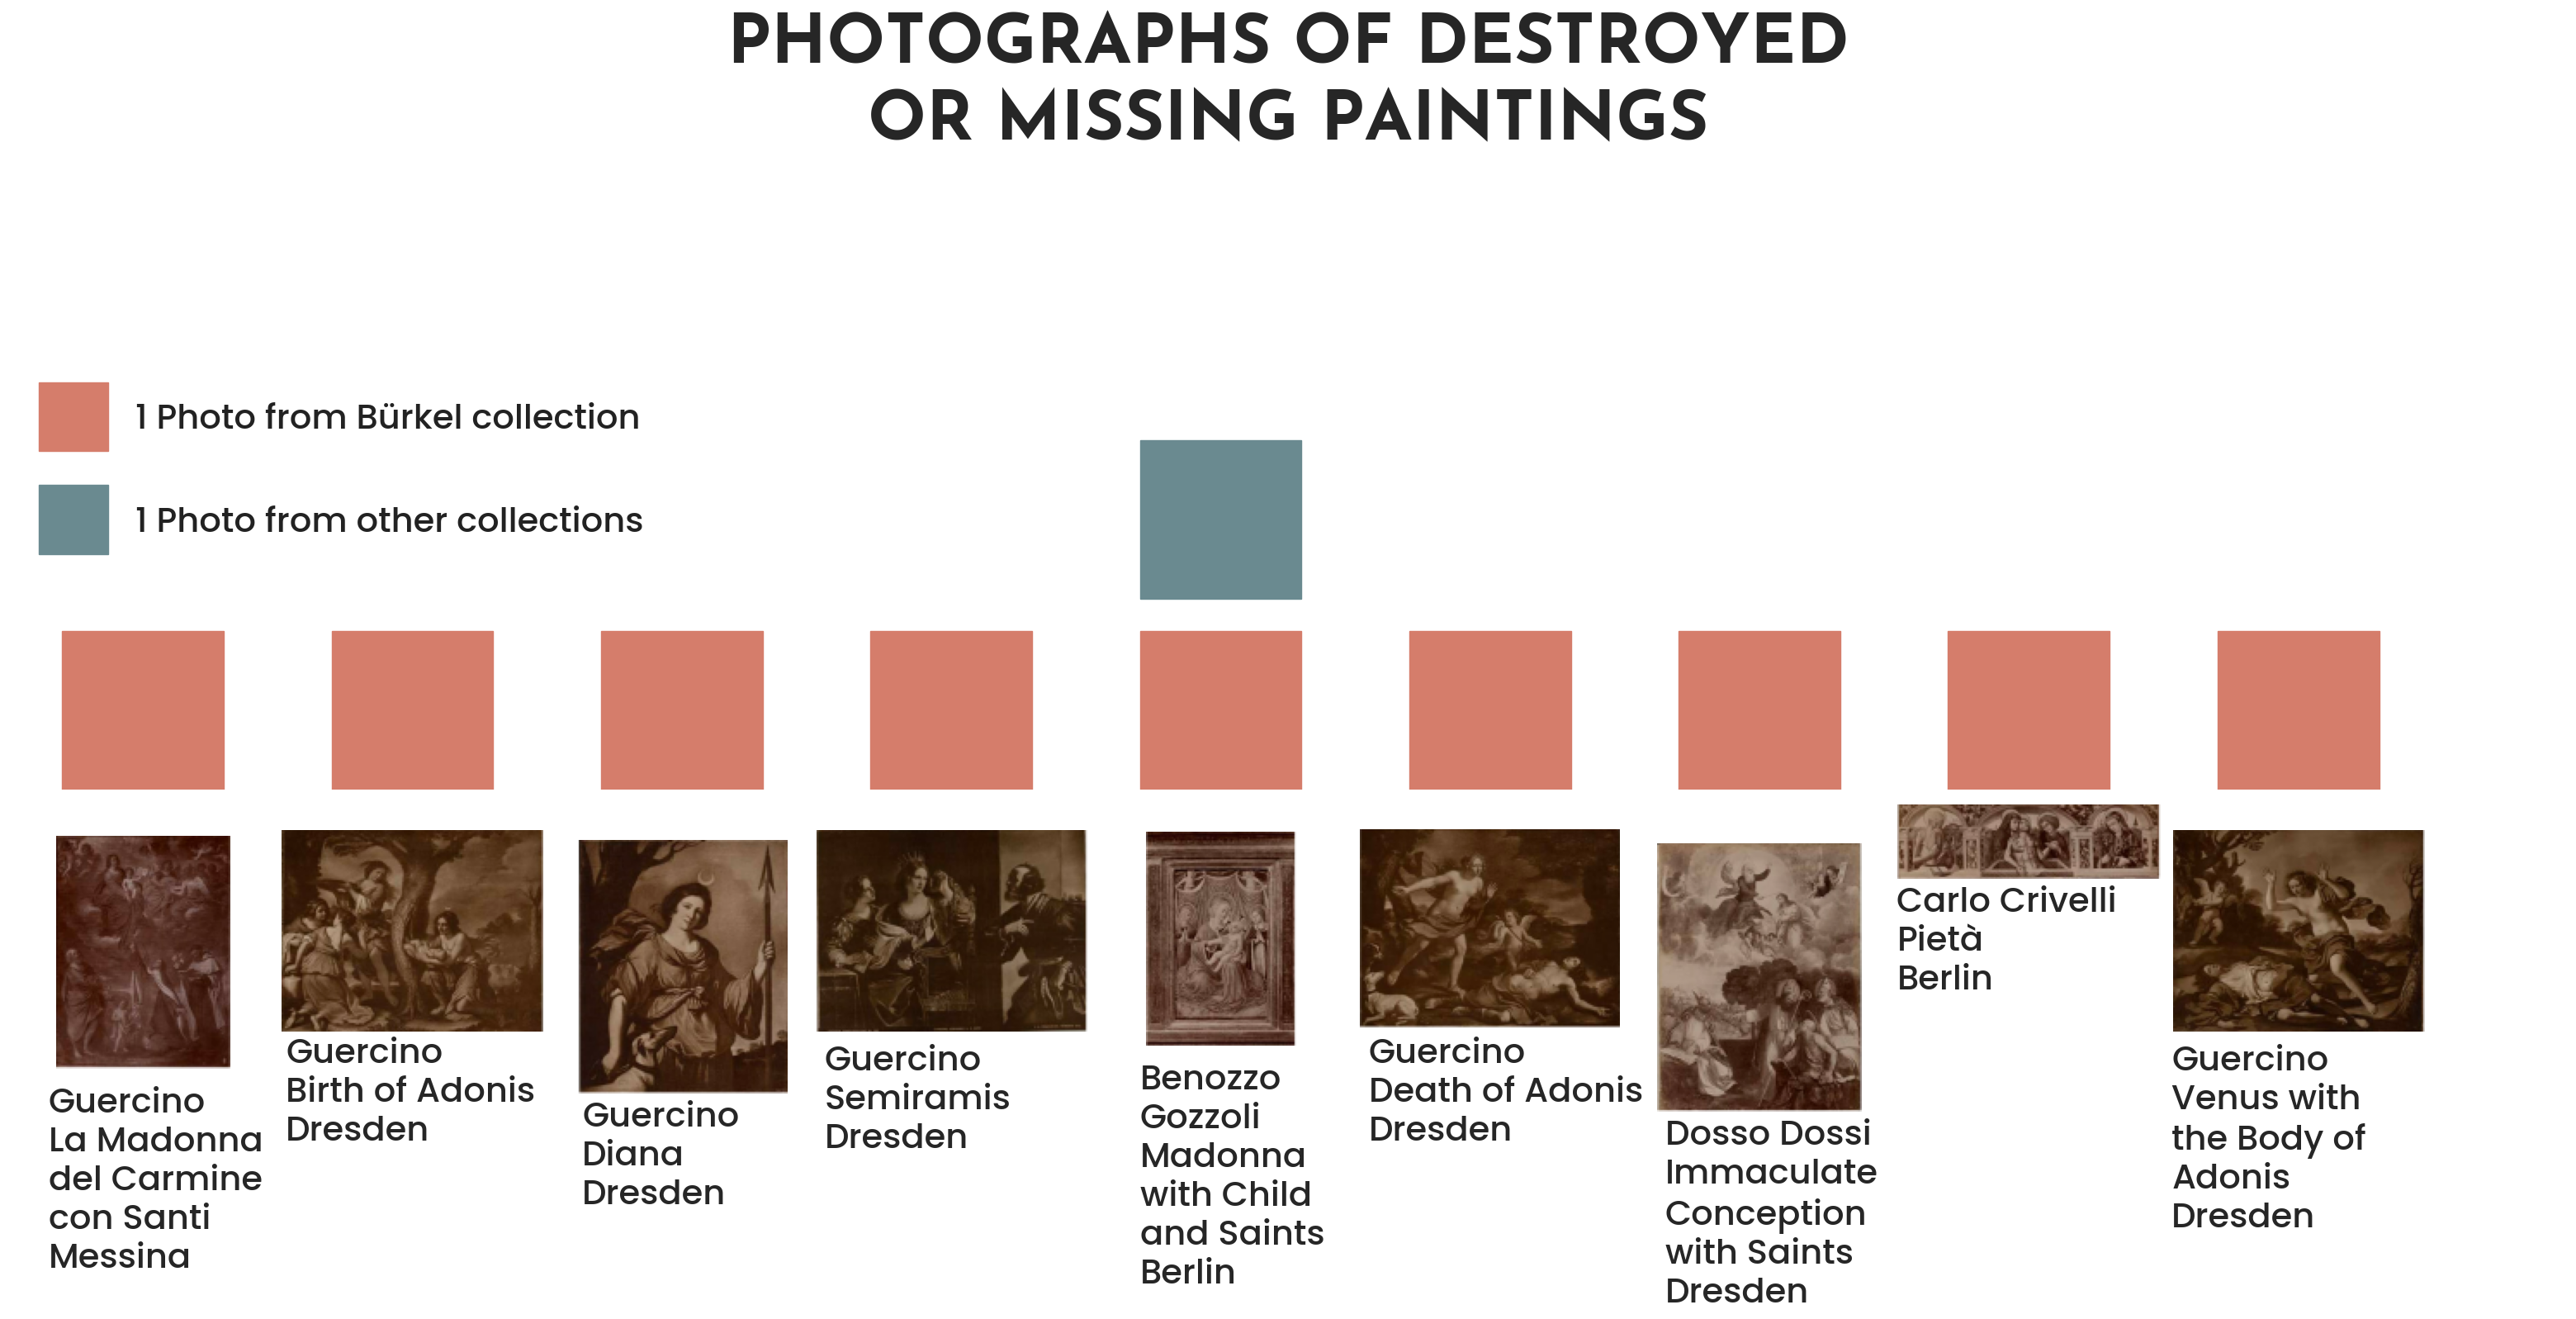

In [123]:
# Create a visualization of the missing and destroyed paintings including images and painting information
plt.figure(figsize=(40,10))
list_of_image = ["1.png", "2.png","3.png","4.png","8.png","9.png","5.png","7.png","6.png"]
img = [plt.imread(i) for i in list_of_image]

plt.bar([''], [''])
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['','','','','','','','','',''])

ax = plt.gca()
tick_labels = ax.xaxis.get_ticklabels()

for i,im in enumerate(img):
    ib = OffsetImage(im, zoom=1.5)
    ib.image.axes = ax
    ab = AnnotationBbox(ib,
                    tick_labels[i].get_position(),
                    frameon=False,
                    box_alignment=(0.5, 1.2)
                    )
    ax.add_artist(ab)
ax.set_facecolor("white")

font_path = '/Users/alessandrafailla/Library/Fonts/JosefinSans-Bold.ttf' #path_base
font_path1 = '/Users/alessandrafailla/Library/Fonts/Poppins-Semibold.ttf'
font_path2 = '/Users/alessandrafailla/Library/Fonts/Poppins-Medium.ttf'
font_path3 = '/Users/alessandrafailla/Library/Fonts/Poppins-SemiBold.ttf'
miss_prop = fm.FontProperties(fname=font_path2, size=30)
miss_prop1 = fm.FontProperties(fname=font_path, size=60)
miss_prop2 = fm.FontProperties(fname=font_path3, size=20)


ax.text(-0.35,-3,'Guercino\nLa Madonna\ndel Carmine\ncon Santi\nMessina',fontproperties=miss_prop) #https://it.wikipedia.org/wiki/File:Guercino,_Francesco_Barbieri_detto_il_Guercino_da_Cento_La_Madonna_del_Carmine_con_San_Giuseppe_e_Santa_Teresa_e_Gloria_d%27_Angeli_Chiesa_di_San_Gregorio_a_Messina.jpg
ax.text(0.53,-2.2,'Guercino\nBirth of Adonis\nDresden',fontproperties=miss_prop) #https://skd-online-collection.skd.museum/Details/Index/569378
ax.text(1.63,-2.6,'Guercino\nDiana\nDresden',fontproperties=miss_prop) #https://skd-online-collection.skd.museum/Details/Index/569325
ax.text(2.53,-2.25,'Guercino\nSemiramis\nDresden',fontproperties=miss_prop) #https://skd-online-collection.skd.museum/Details/Index/569370
ax.text(3.7,-3.1,'Benozzo\nGozzoli\nMadonna\nwith Child\nand Saints\nBerlin',fontproperties=miss_prop) #http://catalogo.fondazionezeri.unibo.it/scheda/opera/14066/Benozzo%20di%20Lese%2C%20Madonna%20con%20Bambino%20e%20angeli%20tra%20santa%20Maria%20Maddalena%20e%20santa%20Marta
ax.text(4.55,-2.2,'Guercino\nDeath of Adonis\nDresden',fontproperties=miss_prop) #https://skd-online-collection.skd.museum/Details/Index/569321
ax.text(5.65,-3.22,'Dosso Dossi\nImmaculate\nConception\nwith Saints\nDresden',fontproperties=miss_prop) #http://catalogo.fondazionezeri.unibo.it/scheda/opera/47171/Luteri%20Giovanni%20Dossi%20Battista%2C%20Immacolata%20Concezione%20con%20sant%27Anselmo%2C%20sant%27Agostino%2C%20san%20Girolamo%20e%20sant%27Ambrogio
ax.text(6.51,-1.25,'Carlo Crivelli\nPietà\nBerlin',fontproperties=miss_prop) #http://catalogo.fondazionezeri.unibo.it/scheda/opera/23058/Crivelli%20Carlo%2C%20Piet%C3%A0%20tra%20san%20Girolamo%20penitente%20e%20santa%20martire
ax.text(7.53,-2.75,'Guercino\nVenus with\nthe Body of\nAdonis\nDresden',fontproperties=miss_prop) #https://skd-online-collection.skd.museum/Details/Index/569291

r=ax.add_patch(Rectangle((-0.3,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((0.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((1.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((2.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((3.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((4.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((5.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((6.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((7.7,0), 0.6, 1, color = '#D57D6B'))
r=ax.add_patch(Rectangle((3.7,1.2), 0.6, 1, color = '#6A8A90', ))
ax.set_title('PHOTOGRAPHS OF DESTROYED\nOR MISSING PAINTINGS', fontproperties=miss_prop1)
plt.xlim((-0.5,9))
plt.ylim((0,4))
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
red_patch = mpatches.Patch(color='#D57D6B', label='1 Photo from Bürkel collection')
blue_patch = mpatches.Patch(color='#6A8A90', label='1 Photo from other collections')
legend=ax.legend(handles=[red_patch, blue_patch], prop=miss_prop, loc ='center left', 
                 frameon=False, labelcolor='#222222', labelspacing=2)

for patch in legend.get_patches():
    patch.set_height(60)
    patch.set_y(-20)


plt.savefig("destr_paintings.png",
                    format='png',dpi=150, bbox_inches = 'tight') #path_base

The preceding analysis reveals that **nine paintings represented in the Bürkel photographic collection are currently missing or have been destroyed**, rendering them inaccessible today. Among these, only the painting by Benozzo Gozzoli is captured in two photographs within the archive, with one originating from the Bürkel collection and the other from a different collection. In contrast, the remaining paintings are each **represented by only a single photograph in the entire archive**, all of which are sourced from the Bürkel collection. This distinction emphasizes the significance and value of these singular photographs and their crucial role in preserving the visual record of these paintings.

## 5.2 Which categories were most impacted by the acquisition of Bürkel's collection?

This section points out the categories and topics that were most impacted by the acquisition of Ludwig von Bürkel's collection:
* **ARTISTS**: What artists is the collection mainly focused on?
* **COUNTRIES**: What are the predominant countries of reference of the artworks?
* **ARTISTIC PERIODS**: Which artistic period is predominantly represented in the photo collection?
* **PHOTOGRAPHERS**: What photographers are mainly featured in the collection?
* **LOCATIONS**: Where are the artworks depicted in Bürkel's collection located?

### 5.2.1 What artists is the collection mainly focused on?

In this section, our objective is to quantify the contribution of the Bürkel collection to the <b>artists</b> category. We provide an overview of the number of photographs featuring each artist in the collection. This analysis offers insights into the artists who were <b>most frequently represented</b>, and provides an overview of the photographic contribution related to artists to the overall collection of the Photothek.

In [124]:
# Create a dataframe featuring artist from the Bürkel collection using
# normalized names to be shown later in the chart
plot_artist=pd.DataFrame(new_df_buerkel['Artist_wd_nameprep'].value_counts())

# Fill empty rows, reset the index, and rename the column to use it as axis label
plot_artist.fillna('Unknown')
plot_artist=plot_artist.reset_index()
plot_artist.rename(columns={"index":"Artist Name"}, inplace=True)

In [125]:
# Group artist from the collection with only 1 photo to exclude them from the visualization
idx_artist_one=plot_artist.loc[plot_artist['Artist_wd_nameprep']!=1].index
_=plot_artist.drop(index=idx_artist_one, inplace=True)
_=plot_artist.reset_index().drop(['index'], axis=1)

In [126]:
# New dataframe containing only artist names; artists with only one photo are renamed as 'Other'
# and are removed together with rows with no data
plot_artist_list=list(plot_artist['Artist Name'])
plot_artist_nofreq=pd.DataFrame(new_df_buerkel['Artist_wd_nameprep'])
for index, artist in plot_artist_nofreq.iterrows():
    for art1 in plot_artist_list:
        if artist[0] == art1:
            artist[0] = 'Other'
            
plot_artist_nofreq = plot_artist_nofreq[plot_artist_nofreq.Artist_wd_nameprep != 'Other']
plot_artist_nofreq = plot_artist_nofreq[plot_artist_nofreq.Artist_wd_nameprep != 'No Data']

In [127]:
# Source dataframe
plot_artist_nofreq.head(10)

,Artist_wd_nameprep
0,Tizian
1,Marco Basaiti
4,Lorenzo Lotto
14,Guercino
17,Guercino
25,Lorenzo Lotto
27,Marcello Venusti
30,Tizian
32,Lorenzo Lotto
43,Correggio


In [128]:
# Information shown in the chart
pd.DataFrame(plot_artist_nofreq['Artist_wd_nameprep'].value_counts().head(10))

,Artist_wd_nameprep
Guercino,48
Tizian,10
Lorenzo Lotto,9
Raffael,9
Correggio,6
Antonio del Pollaiuolo,5
Jacopo Palma,4
Alessandro Moretto,4
Garofalo,3
Carlo Crivelli,3


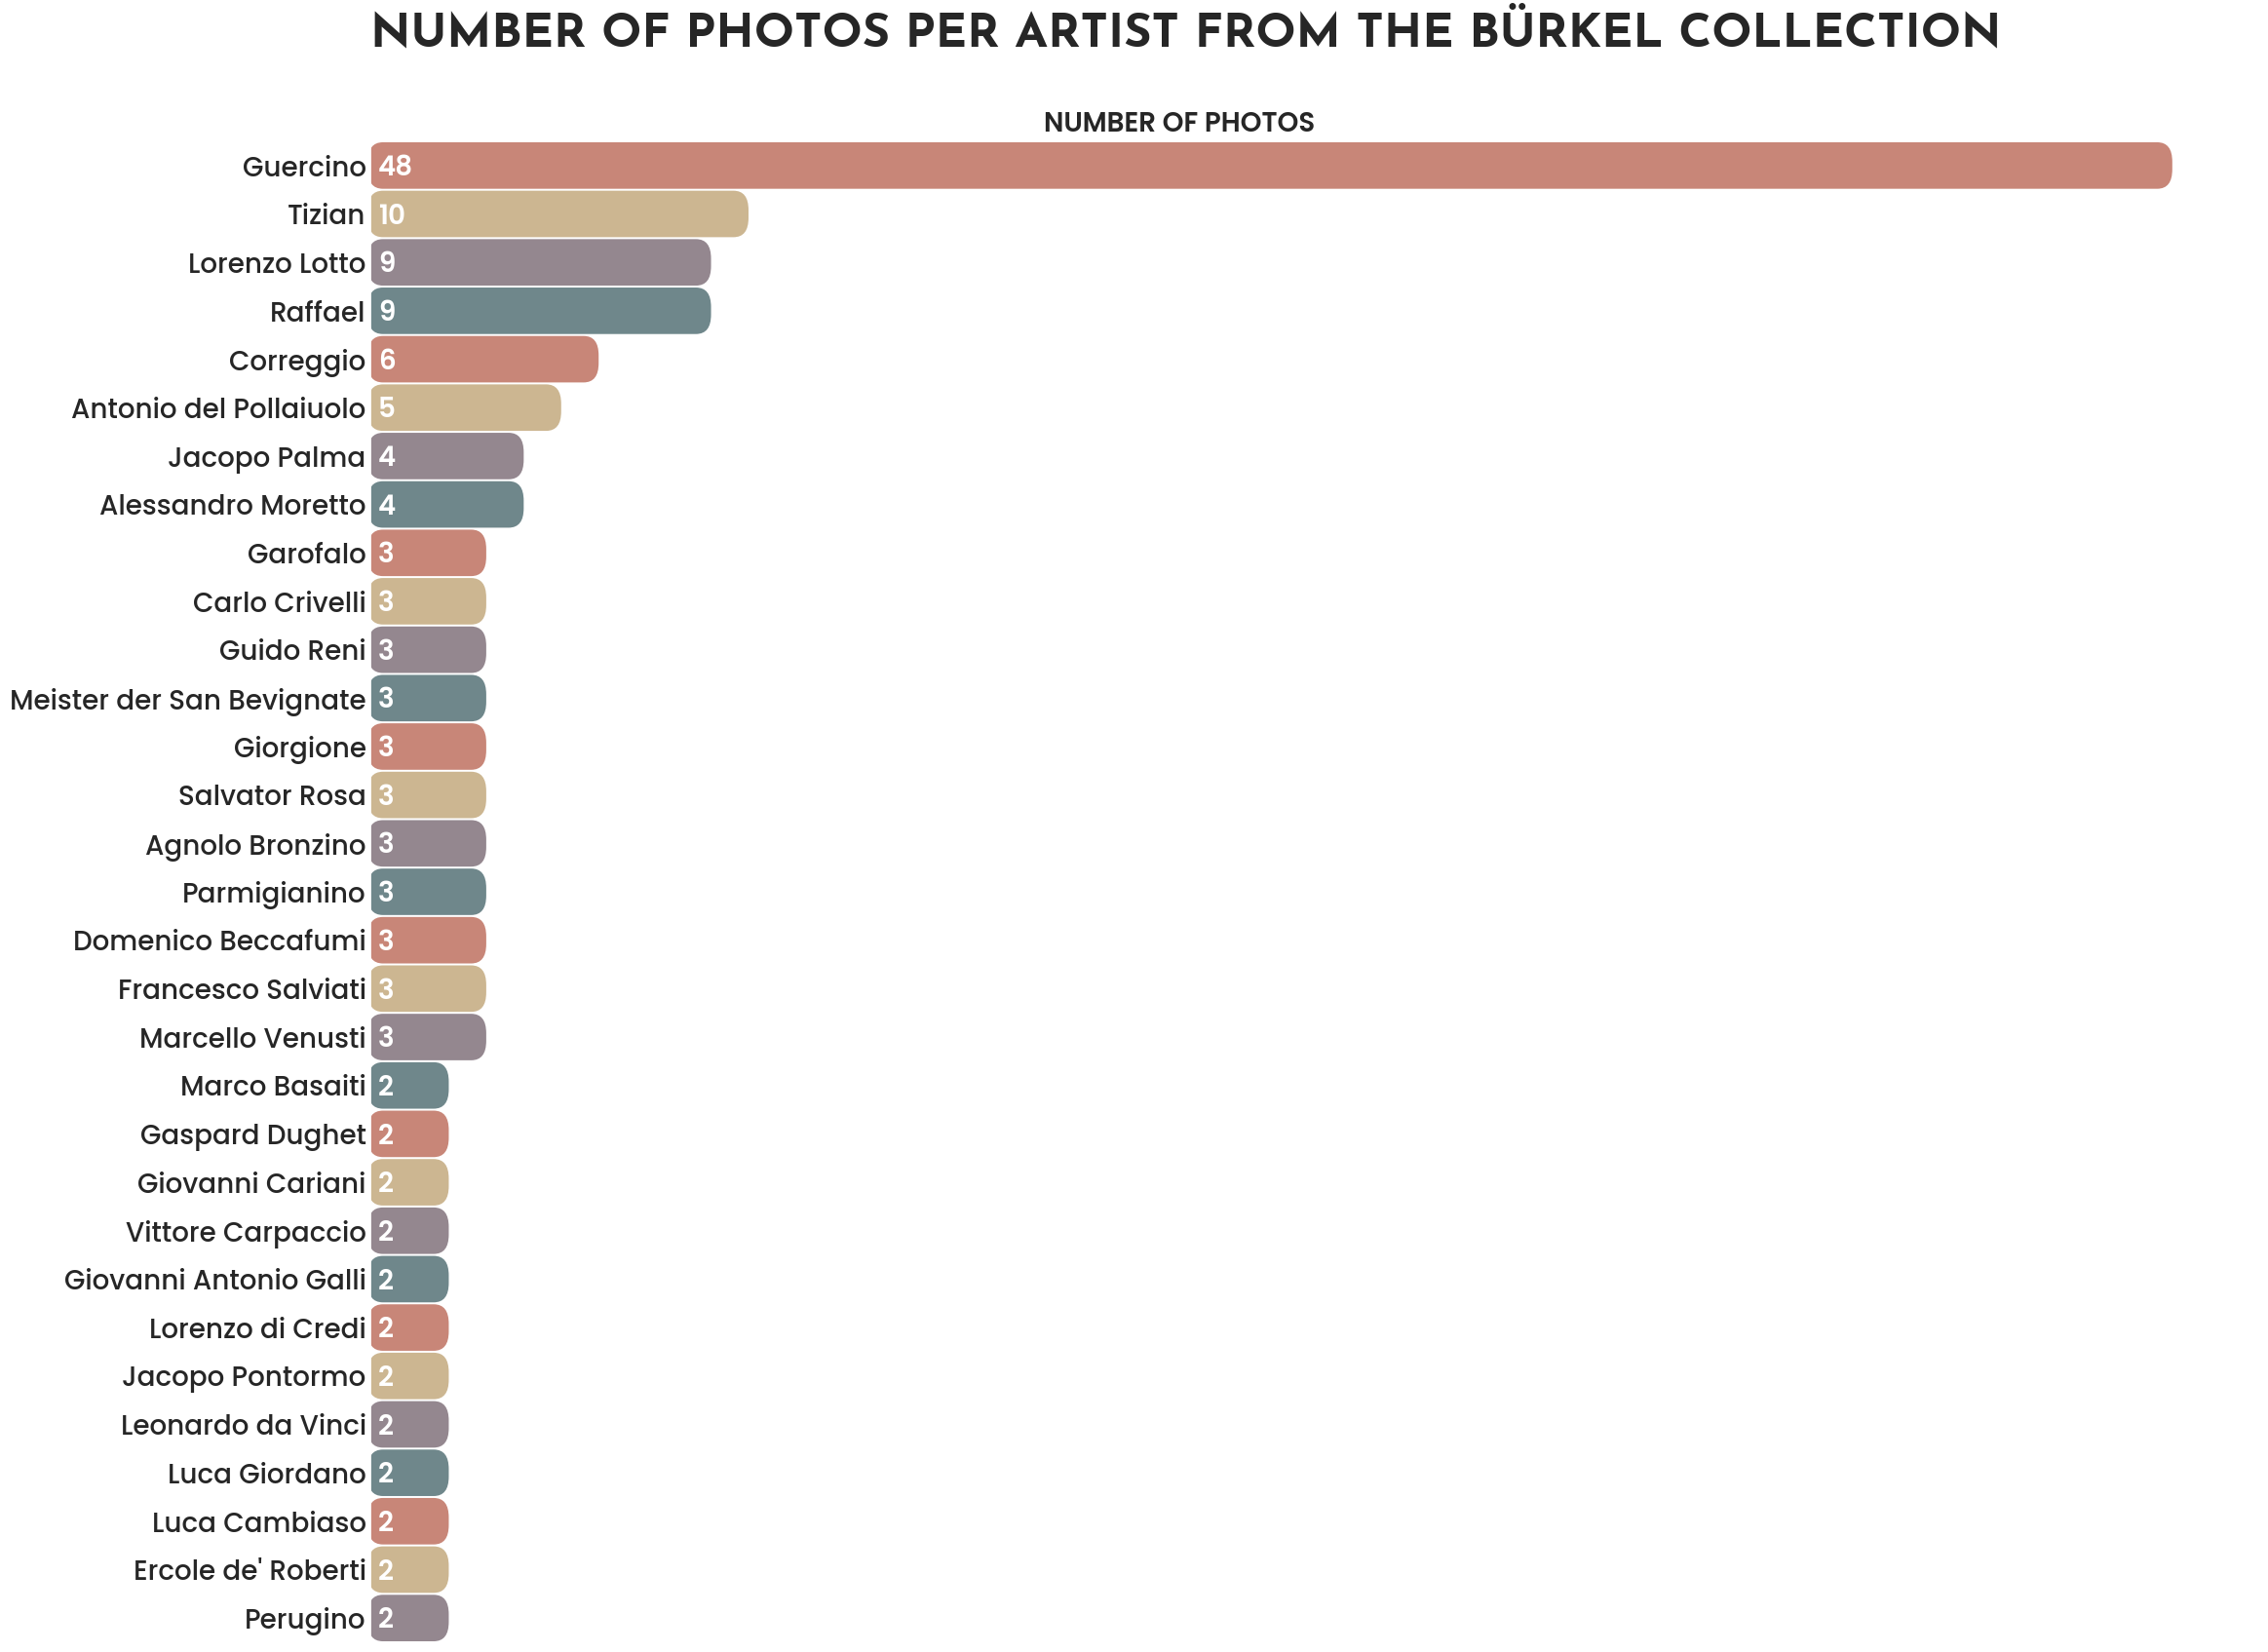

In [129]:
# Apply the default theme
# sns.set_theme() in older versions of seaborn
figure, ax=plt.subplots(figsize=(25,20))
sns.set()

# count function to show the number of observations of the category artist in the dataset as bar chart
my_plot = sns.countplot(y="Artist_wd_nameprep", data=plot_artist_nofreq, order = 
                        plot_artist_nofreq['Artist_wd_nameprep'].value_counts().index, 
                        palette=['#D57D6B', '#D6B987', '#96858F', '#6A8A90'])

# Custom style and properties
prop_11 = fm.FontProperties(fname=font_path, size=35)
prop_12 = fm.FontProperties(fname=font_path2, size=20)
prop_13 = fm.FontProperties(fname=font_path1, size=20)
prop_14 = fm.FontProperties(fname=font_path1, size=34)
plt.yticks(fontproperties=prop_12)
ax.set_title('NUMBER OF PHOTOS PER ARTIST FROM THE BÜRKEL COLLECTION', pad=70, fontproperties=prop_11, loc='left')
ax.set_facecolor("white")
ax.set_xlabel('NUMBER OF PHOTOS', fontproperties=prop_13, loc='right')
ax.set_xticklabels('')
ax.tick_params(length=0)
ax.set_ylabel('', fontproperties=prop_13)
ax.xaxis.set_label_coords(0.5,1.02)

# Add numbers and round patches
for p in ax.patches:
    perc = int(p.get_width()) #the label for the bar
    x = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.annotate(perc, (0.2, y+0.2), color="white", fontproperties=prop_13) 
new_patches = []

for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=0.08,rounding_size=0.4",
                        ec="none", fc=color,
                        mutation_aspect=1
                        )
    patch.remove()
    new_patches.append(p_bbox)
for patch in new_patches:
    ax.add_patch(patch)
    
# Save image
plt.savefig("artists_distrib.png",
                    format='png',dpi=150, bbox_inches = 'tight') #path_base
plt.show()

This section shows the **most represented artists**, focusing on the number of photographs within the Bürkel collection.
The most represented artist in the collection is unquestionably the Italian Baroque painter **Guercino**, featured in **48 photographs**. The acquisition of the art historian collection allowed to considerably increase the number of photos of Guercino's paintings in the Photothek.

### 5.2.2 What are the predominant countries of reference of the artworks?

We can use the data extracted through the previous **SPARQL queries** to find information about paintings geographical reference by considering all artists' **origin countries** and determine if a specific category is most frequent and was particularly enriched in the Photothek.

In [130]:
# Creation of a dataframe to include artists frequency, countries, their latitude and longitude to be 
# shown in the map below
artist_origin_loc=pd.DataFrame(columns=['artist','origin_country',  'Latitude', 'Longitude', 'count'])
artist_origin_loc['artist']=artist_freq['artist_wd_Name']
artist_origin_loc['origin_country']=artist_freq['BirthPlace_Label']

In [131]:
# If the origin country is not known, the row is removed from the dataframe
for idx, el in artist_origin_loc.iterrows():
    if el['origin_country']=='':
        artist_origin_loc=artist_origin_loc.drop(index=idx)
        
# Artists names are removed as they will not be shown in the graph
if 'artist' in artist_origin_loc.columns:
    artist_origin_loc=artist_origin_loc.drop(columns=['artist'])
artist_origin_loc=artist_origin_loc.reset_index(drop=True)

In [132]:
# The dataframe is filled with information about countries using the Nominatim geocoder from the geopy library
loc = Nominatim(user_agent="GetLoc")
set_origin=set(artist_origin_loc["origin_country"])
new_artist_origin_loc=pd.DataFrame(columns=['country', 'lat', 'lon'])
getLocList=[]
for i in set_origin:
    getLocList=[]
    getLoc = loc.geocode(i)
    LocAddress=getLoc.address.split(",")
    getLocList.append(i)
    getLocList.append(getLoc.latitude)
    getLocList.append(getLoc.longitude)
    new_artist_origin_loc.loc[len(new_artist_origin_loc)] = getLocList

# Resulting dataframe
new_artist_origin_loc.head()

,country,lat,lon
0,Italy,42.638426,12.674297
1,Belgium,50.640281,4.666715
2,United Kingdom,54.702354,-3.276575


In [133]:
# Addition of a column indicating countries frequency
new_artist_origin_loc['count']=''
artist_origin_loc['count']=artist_origin_loc['origin_country'].map(artist_origin_loc['origin_country'].value_counts())

# Addition of countries frequency data to the dataframe
for idx, el in new_artist_origin_loc.iterrows():
    for edx, il in artist_origin_loc.iterrows():
        if el['country']==il['origin_country']:
            new_artist_origin_loc.loc[idx,'count'] = il['count']

# Resulting dataframe to be used for the visualization
new_artist_origin_loc.head()

,country,lat,lon,count
0,Italy,42.638426,12.674297,105
1,Belgium,50.640281,4.666715,1
2,United Kingdom,54.702354,-3.276575,1


In [134]:
# Creation of a mapbox scatter plot with the plotly library to show the distribution of artists' origin countries
fig_map_artists = px.scatter_mapbox(new_artist_origin_loc,
                           lon=new_artist_origin_loc['lon'], lat=new_artist_origin_loc['lat'],
                           size=pd.to_numeric(new_artist_origin_loc['count']),
                           zoom=3,
                            color=new_artist_origin_loc['country'],
                           color_discrete_sequence=['#f5c168','#ca5a43','#44a4b6'],
                            title="N. OF ARTISTS FOR ORIGIN COUNTRIES",
                            size_max=105,
                            opacity=0.8,
                            labels=new_artist_origin_loc['country'], hover_name='country',
                            hover_data={'count':False, 'lat':False, 'lon':False})

# Updating the layout
fig_map_artists.update_layout(
    title_font_family='JosefinSans-Bold',
    title_font_size=24,
    font_family='Poppins-Medium',
    font_color="#222222",
    font_size=12,
    legend_title_font_color="#222222",
    plot_bgcolor='#f8f8f8',
    title_x=0.5,
    title_y=0.88,
    showlegend=False,
    margin=dict(l=0, r=0, t=0, b=0)

)

# Save visualization
fig_map_artists.update_layout(mapbox_style='open-street-map')
fig_map_artists.write_html("loc.html")
fig_map_artists.show()

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.



Interestingly, it is clearly shown that the collection primarily focuses on **Italian artists**, including a total of **105**. The collection features only two artists from different countries, specifically from **Belgium** and the **United Kingdom**, highlighting the collection's emphasis and Bürkel's interest on Italian art.

### 5.2.3 Which artistic period is predominantly represented in the photo collection?

Here, we explore the distribution of photographs in Bürkel's collection based on different **artistic periods** according to the classification of the KHI Photothek.

In [135]:
# Creation of a new dataframe with artistic period data about photographs
plot_period = pd.DataFrame(new_df_buerkel['Photo_KHI_Classification'])
plot_period.reset_index(drop=True, inplace=True)
plot_period['Photo_KHI_Classification']=plot_period['Photo_KHI_Classification'].astype(str)

# Data to be included in the graph
value = plot_period['Photo_KHI_Classification'].value_counts()
value

Mal. Ren.      147
Mal. Bar.       79
Mal. Roman.      3
Mal. Franz.      2
Name: Photo_KHI_Classification, dtype: int64

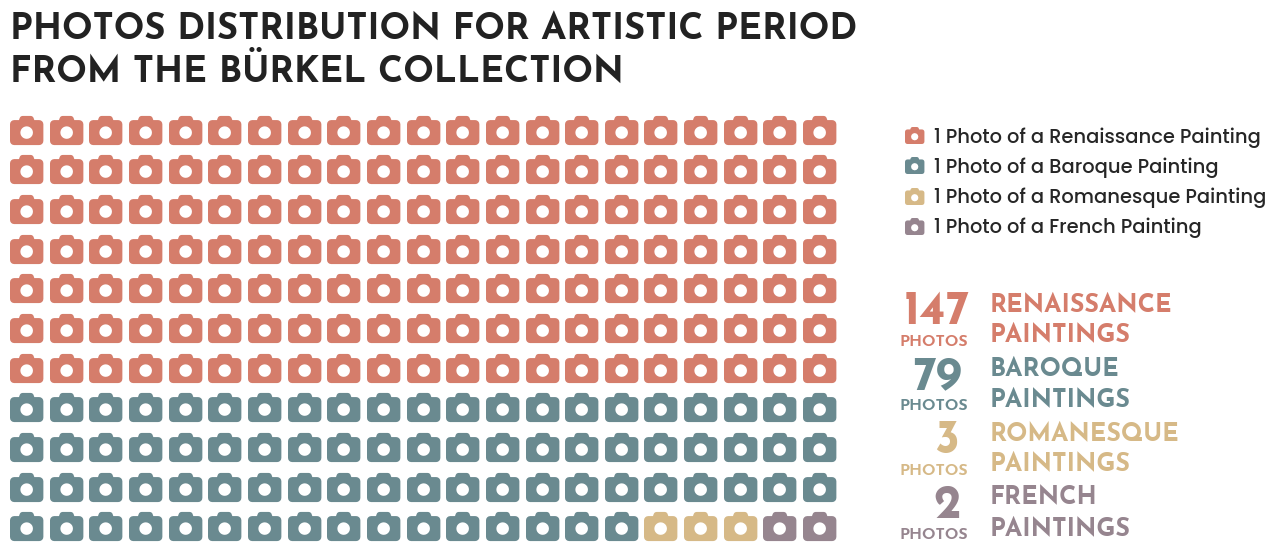

In [136]:
# Initialization of style properties
colors=['#D57D6B', '#6A8A90', '#D6B987', '#96858f']
font_path = '/Users/alessandrafailla/Library/Fonts/JosefinSans-Bold.ttf'
font_path1 = '/Users/alessandrafailla/Library/Fonts/Poppins-Semibold.ttf'
font_path2 = '/Users/alessandrafailla/Library/Fonts/Poppins-Medium.ttf'
propertyfont = fm.FontProperties(fname=font_path, size=26)
propertyfont1 = fm.FontProperties(fname=font_path2, size=14)
propertyfont2 = fm.FontProperties(fname=font_path, size=18)
propertyfont3 = fm.FontProperties(fname=font_path, size=34)
propertyfont4 = fm.FontProperties(fname=font_path, size=11.5)

# Creation of a waffle chart using pywaffle library
periods=plt.figure(
    figsize=(13,20),
    FigureClass = Waffle,
    rows = 11,
    title = {"label": ""},
    values = value,
    colors= colors,
    icons = 'camera',
    vertical= True,
    starting_location='NW',
    font_size=24,
    icon_legend=True,
    legend = {'labels':[
        '1 Photo of a Renaissance Painting',
        '1 Photo of a Baroque Painting',
        '1 Photo of a Romanesque Painting',
        '1 Photo of a French Painting'],
              'handletextpad':0,
              'loc': 'upper left',
              'bbox_to_anchor': (1.05, 1),
              'framealpha': 0,
              'prop':propertyfont1})


# Addition of title and informative text 
plt.title(label='PHOTOS DISTRIBUTION FOR ARTISTIC PERIOD\nFROM THE BÜRKEL COLLECTION',fontproperties=propertyfont, pad=20, loc='left', color='#222222')
plt.text(2.28, 0.46, 'RENAISSANCE\nPAINTINGS', fontproperties=propertyfont2, color='#D57D6B')
plt.text(2.08, 0.5, '147', fontproperties=propertyfont3, color='#D57D6B')
plt.text(2.07, 0.45, 'PHOTOS', fontproperties=propertyfont4, color='#D57D6B')
plt.text(2.28, 0.31, 'BAROQUE\nPAINTINGS', fontproperties=propertyfont2, color='#6A8A90')
plt.text(2.1, 0.35, '79', fontproperties=propertyfont3, color='#6A8A90')
plt.text(2.07, 0.3, 'PHOTOS', fontproperties=propertyfont4, color='#6A8A90')
plt.text(2.28, 0.16, 'ROMANESQUE\nPAINTINGS', fontproperties=propertyfont2, color='#D6B987')
plt.text(2.15, 0.2, '3', fontproperties=propertyfont3, color='#D6B987')
plt.text(2.07, 0.15, 'PHOTOS', fontproperties=propertyfont4, color='#D6B987')
plt.text(2.28, 0.01, 'FRENCH\nPAINTINGS', fontproperties=propertyfont2, color='#96858f')
plt.text(2.15, 0.05, '2', fontproperties=propertyfont3, color='#96858f')
plt.text(2.07, 0, 'PHOTOS', fontproperties=propertyfont4, color='#96858f')
plt.savefig("artperiod_distrib.png",
                    format='png',dpi=150, bbox_inches = 'tight')
plt.show()

The pictogram shows an overview of the distribution of artistic periods within the collection: **147 photos** of **Renaissance paintings**, which almost double the number of photos of Baroque artworks. We can observe that out of the **79 photographs of Baroque paintings**, an impressive 48 of them are dedicated to the works of Guercino. In contrast, the subset of Renaissance photographs exhibits a more **diverse distribution of artists**, as shown in the previous section, presenting a broader range of contributors from this period.

### 5.2.4 What photographers are mainly featured in the collection?

The existence of Bürkel's collection as we know it today owes much to the work of its **photographers**. The photographers  featured in the photo collection are shown in the graph below ordered according the number of their photos in the collection. We use data from the dataframe with **only photos from the Bürkel collection** to provide the plot.

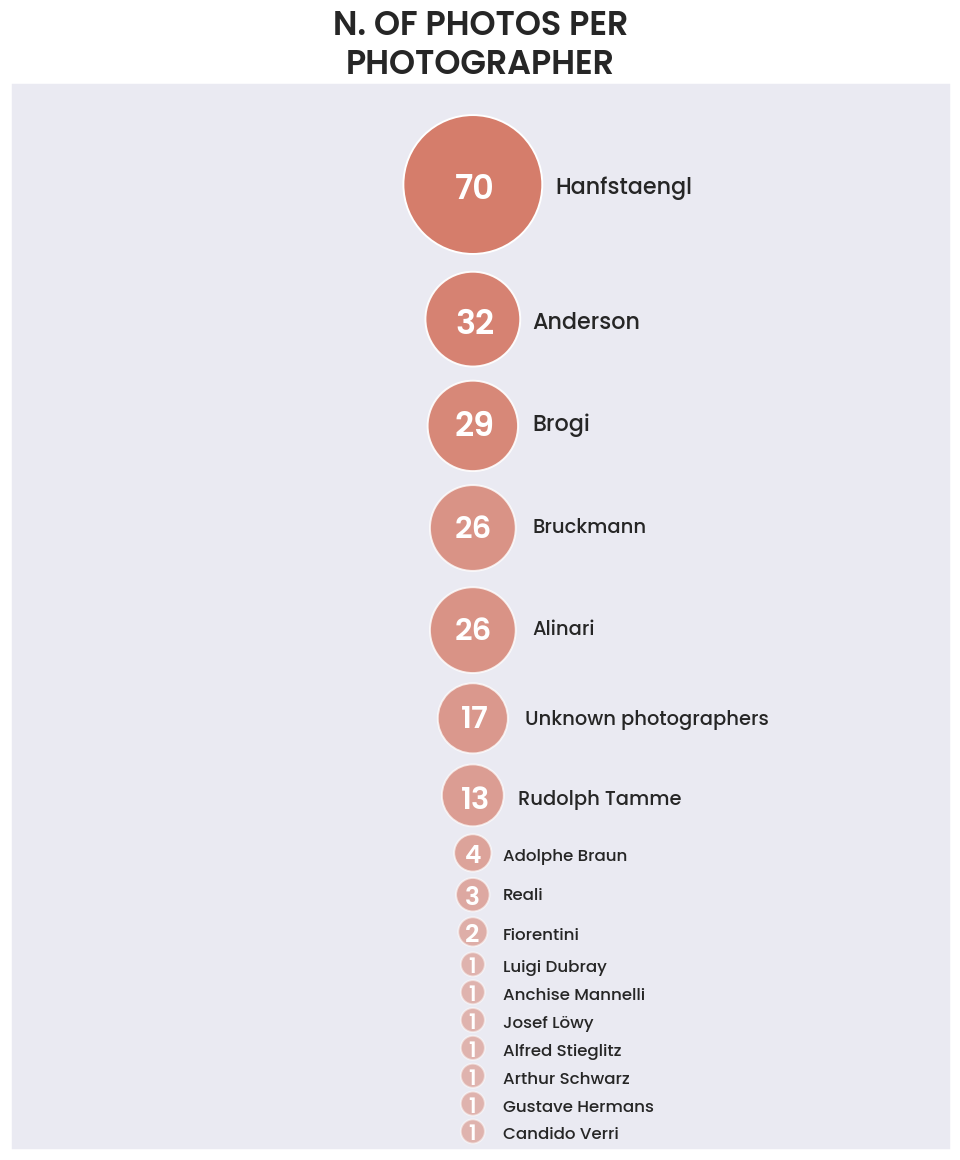

In [137]:
# Positions of the bubbles
yposiz=[104, 89.5, 78, 67, 56, 46.5, 38.2, 32, 27.5, 23.5, 20, 17, 14, 11, 8, 5, 2]

# Font properties initialization
font_path_black = '/Users/alessandrafailla/Library/Fonts/Poppins-Semibold.ttf'
property_font = fm.FontProperties(fname=font_path1, size=24)
property_font_med = fm.FontProperties(fname=font_path1, size=22)
property_font_sm = fm.FontProperties(fname=font_path1, size=18)
property_font_xs = fm.FontProperties(fname=font_path1, size=15)
property_font1 = fm.FontProperties(fname=font_path2, size=16)
property_font1_1 = fm.FontProperties(fname=font_path2, size=14)
property_font1_2 = fm.FontProperties(fname=font_path2, size=12)
property_font2 = fm.FontProperties(fname=font_path_black, size=16)

# Create a scatterplot using Seaborn with data about photographers from the Bürkel dataframe
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,12))
sns.scatterplot(x=30,
                y=yposiz,
                size=new_df_buerkel['Photo_Photographer'].value_counts(),
                sizes=(300,10000),
                alpha=[1,0.95,0.9,0.8,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
                color='#D57D6B',
                data=new_df_buerkel['Photo_Photographer'].value_counts(),
                legend=False,
               )


# Remove legend from the visualization
# plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)

# Set all parameters: title, style, labels and data, axis limits
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title("N. OF PHOTOS PER\nPHOTOGRAPHER", loc='center', fontproperties=property_font)
plt.tight_layout()
sns.set_style(rc = {'axes.facecolor': 'white', 'facecolor':'white'})
plt.ylim(0,115)
plt.xlim(-1,62)
plt.text(28.8,102.5,'70',fontproperties=property_font, color='white')
plt.text(35.5,103,'Hanfstaengl',  fontproperties=property_font1)
plt.text(28.8,88,'32',fontproperties=property_font, color='white')
plt.text(34,88.5,'Anderson', fontproperties=property_font1)
plt.text(28.8,77,'29',fontproperties=property_font, color='white')
plt.text(34,77.5,'Brogi', fontproperties=property_font1)
plt.text(28.8,66,'26',fontproperties=property_font_med, color='white')
plt.text(34,66.5,'Bruckmann', fontproperties=property_font1_1)
plt.text(28.8,55,'26',fontproperties=property_font_med, color='white')
plt.text(34,55.5,'Alinari', fontproperties=property_font1_1)
plt.text(29.2,45.5,'17',fontproperties=property_font_med, color='white')
plt.text(33.5,45.8,'Unknown photographers',fontproperties=property_font1_1)
plt.text(29.2,36.8,'13',fontproperties=property_font_med, color='white')
plt.text(33,37.2,'Rudolph Tamme', fontproperties=property_font1_1)
plt.text(29.5,31,'4',fontproperties=property_font_sm, color='white')
plt.text(32,31.2,'Adolphe Braun', fontproperties=property_font1_2)
plt.text(29.5,26.5,'3',fontproperties=property_font_sm, color='white')
plt.text(32,27,'Reali', fontproperties=property_font1_2)
plt.text(29.5,22.5,'2',fontproperties=property_font_sm, color='white')
plt.text(32,22.7,'Fiorentini', fontproperties=property_font1_2)
plt.text(29.7,19.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,19.2,'Luigi Dubray', fontproperties=property_font1_2)
plt.text(29.7,16.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,16.2,'Anchise Mannelli', fontproperties=property_font1_2)
plt.text(29.7,13.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,13.2,'Josef Löwy', fontproperties=property_font1_2)
plt.text(29.7,10.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,10.2,'Alfred Stieglitz', fontproperties=property_font1_2)
plt.text(29.7,7.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,7.2,'Arthur Schwarz', fontproperties=property_font1_2)
plt.text(29.7,4.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,4.2,'Gustave Hermans', fontproperties=property_font1_2)
plt.text(29.7,1.1,'1',fontproperties=property_font_xs, color='white')
plt.text(32,1.3,'Candido Verri', fontproperties=property_font1_2)


#Save figure
plt.savefig("photographers_plt.png",
                    format='png',dpi=150)

### 5.2.5 Where are the artworks depicted in Bürkel's collection located?

We use the dataframe of the Bürkel photo collection to gain information about the locations of the featured paintings. First we determine the **number of paintings for each city**.

In [138]:
#New dataframe with painting - location
df_paint_loc=pd.DataFrame()
painting_list=list(set(new_df_buerkel['Art_id0']))
df_paint_loc['Painting_id']=df_paint_loc['Painting_id'].loc[len(df_paint_loc['Painting_id'])] = pd.Series(painting_list)
df_paint_loc['Painting_Location']=''

# Fill the dataframe with paintings IDs and their locations
for idx, el in new_df_buerkel.iterrows():
    for edx, il in df_paint_loc.iterrows():
        if el['Art_id0'] == il['Painting_id']:
            df_paint_loc['Painting_Location'][edx] = el['Art_GeoLocation0']

df_paint_loc.fillna('not_found', inplace=True)

df_paint_loc

,Painting_id,Painting_Location
0,70013051,Florenz
1,07770246,San Gimignano
2,70013063,Berlin
3,70013035,Dresden
4,70013068,Rom
...,...,...
208,70013202,München
209,70013066,Wien
210,70013064,Dresden
211,70013005,Mailand


In [139]:
# Remove double names and alternative names
set_locations=set(df_paint_loc["Painting_Location"])
tmplist=[]
for el in set_locations:
    if el == 'Frankfurt (Main)':
        tmplist.append(el)
    elif el == 'Firenze':
        tmplist.append(el)
    
for elm in tmplist:
    if elm in set_locations:
        set_locations.remove(elm)

set_locations.remove('not_found')

In [140]:
#Use geopy to find cities coordinates and create a new dataframe with all necessary information
loc = Nominatim(user_agent="GetLoc")
loc_coord_df = pd.DataFrame(columns=['df_Loc_Name','Location', 'Country', 'Latitude', 'Longitude'])
getLocList=[]
for i in set_locations:
    getLoc = loc.geocode(i)
    getLocList=[]
    LocAddress=getLoc.address.split(",")
    getLocList.append(i)
    getLocList.append(LocAddress[0])
    getLocList.append(LocAddress[-1])
    getLocList.append(getLoc.latitude)
    getLocList.append(getLoc.longitude)
    loc_coord_df.loc[len(loc_coord_df)] = getLocList

In [141]:
# Add location frequency information
df_paint_loc['Count'] = df_paint_loc['Painting_Location'].map(df_paint_loc['Painting_Location'].value_counts())
loc_coord_df['Count']=''

for idx, el in df_paint_loc.iterrows():
    for edx, il in loc_coord_df.iterrows():
        if el['Painting_Location'] == il['df_Loc_Name']:
            loc_coord_df.loc[edx, 'Count'] = el['Count']

loc_coord_df.head()

,df_Loc_Name,Location,Country,Latitude,Longitude,Count
0,Budapest,Budapest,Magyarország,47.481390,19.146094,1
1,Avignon,Avignon,France,43.949249,4.805901,1
2,München,München,Deutschland,48.137108,11.575382,12
3,Messina,Messina,Italia,38.193757,15.554208,3
4,Brüssel,Ville de Bruxelles - Stad Brussel,België / Belgique / Belgien,50.846557,4.351697,2


In [142]:
# Font properties
font_path = '/Users/alessandrafailla/Library/Fonts/JosefinSans-Bold.ttf'
font_path1 = '/Users/alessandrafailla/Library/Fonts/Poppins-Semibold.ttf'
font_path2 = '/Users/alessandrafailla/Library/Fonts/Poppins-Medium.ttf'
font_path3 = '/Users/alessandrafailla/Library/Fonts/Poppins-SemiBold.ttf'


# Create a new scatter mapbox to show the number of paintings for each city
fig_map = px.scatter_mapbox(loc_coord_df,
                            lon=loc_coord_df['Longitude'], lat=loc_coord_df['Latitude'],
                            size=pd.to_numeric(loc_coord_df['Count']),
                            zoom=3,
                            color=loc_coord_df['Country'],
                            color_discrete_sequence=['#f88955','#44a4b6',
                                                     '#ca5a43','#57a389',
                                                     '#85678b', '#f5c168','#D6B987',
                                                     '#596dce','#843946',
                                                    '#398477','#8569bd'],
                            title="<b>NUMBER OF PAINTINGS FOR EACH LOCATION</b>",
                            size_max=50,
                            labels=loc_coord_df['df_Loc_Name'], hover_name='Location',
                            hover_data={'df_Loc_Name':False, 'Latitude':False, 'Longitude':False})


# Custom the layout of the figure
fig_map.update_layout(
    title_font_family='JosefinSans-Bold',
    title_font_size=24,
    font_family='Poppins-Medium',
    font_color="#222222",
    font_size=12,
    legend_title_font_color="#222222",
    plot_bgcolor='#f8f8f8',
    title_x=0.5,
    title_y=0.88,
    showlegend=False,
    margin=dict(l=0, r=0, t=0, b=0) 
)

# Show and download result
fig_map.update_layout(mapbox_style='open-street-map')
fig_map.write_html("loc1.html")
fig_map.show()

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/alessandrafailla/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Passing a dict as an indexer is deprecated and will raise in

We create a further bar chart to show the **holding institutions** of the paintings by using data from the Bürkel dataframe.

In [143]:
# New dataframe with institution names 
df_for_locations=pd.DataFrame(new_df_buerkel['Art_Institution0'])
df_for_locations['Art_Institution0'].value_counts()
df_for_locations=df_for_locations.groupby('Art_Institution0').filter(lambda x : len(x)>1)
df_for_locations.reset_index(drop=True).head()

,Art_Institution0
0,National Gallery
1,Kunsthistorisches Museum
2,Kunsthistorisches Museum Wien
3,Staatliche Museen zu Berlin - Preußischer Kult...
4,Gemäldegalerie Alte Meister Dresden


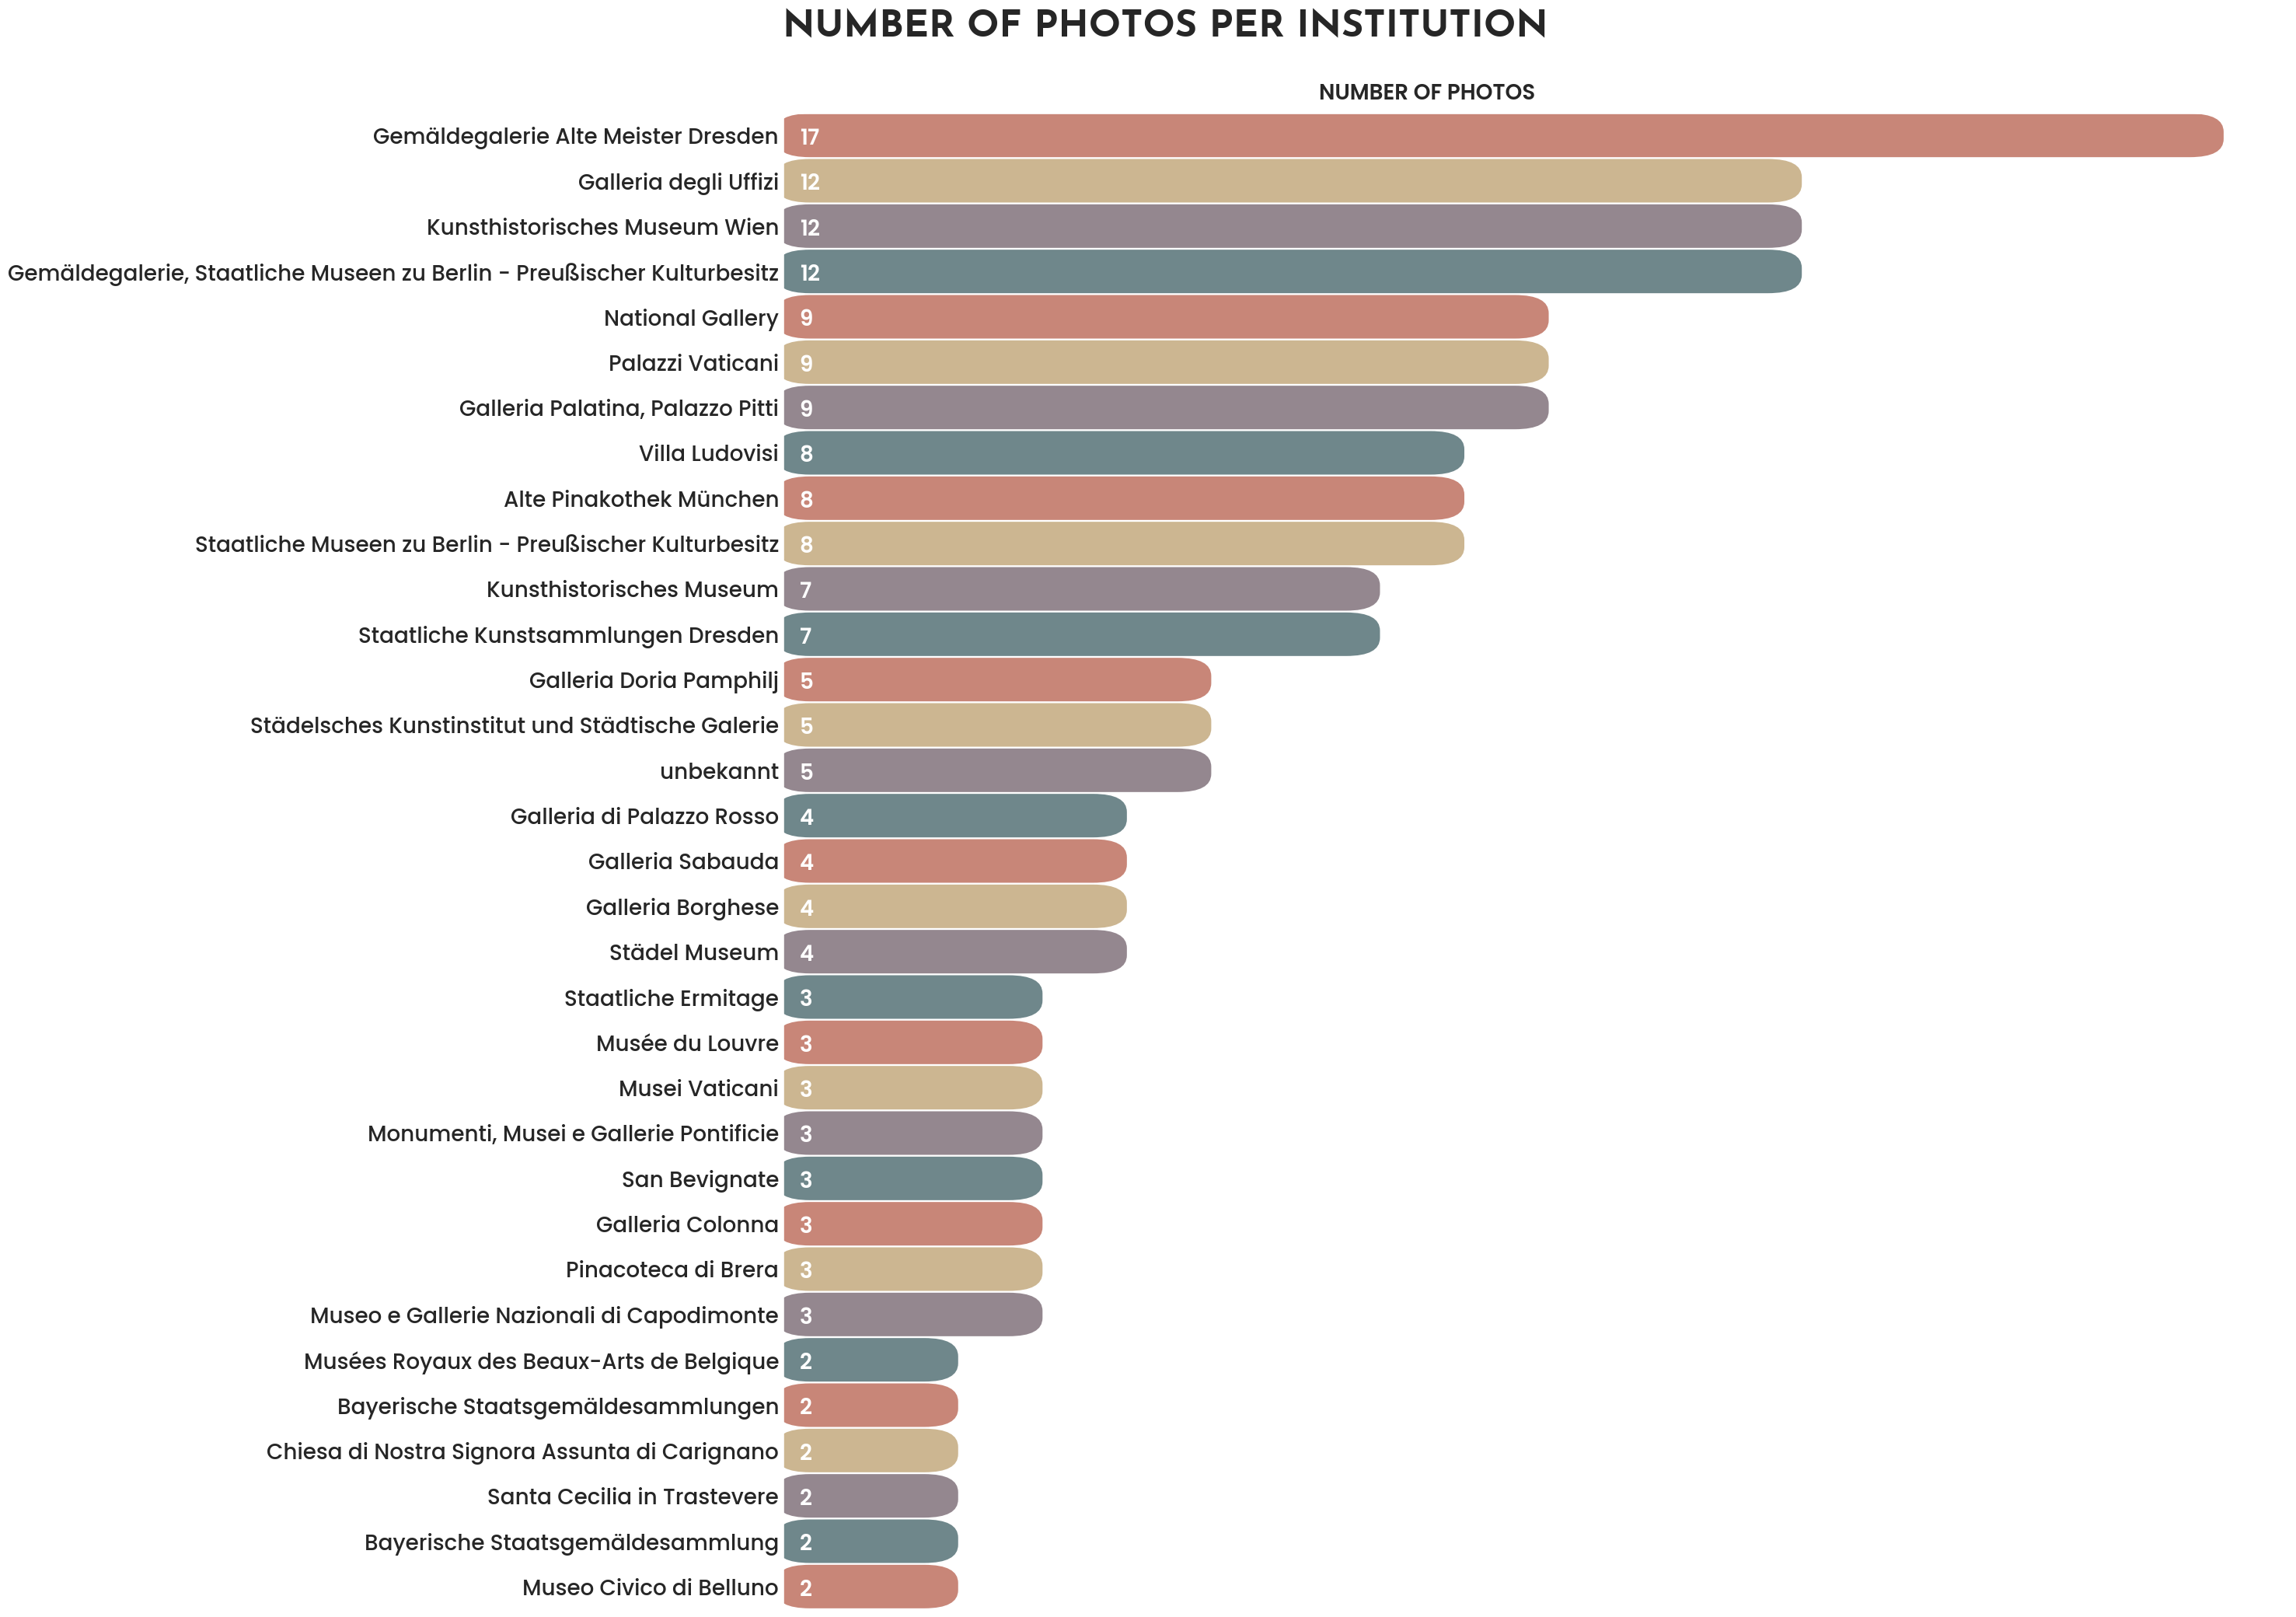

In [144]:
# Create a new bar chart using seaborn
figure, ax=plt.subplots(figsize=(25,25))
sns.set()

# Create a plot to show the number of observations of institutions in the dataset as a bar chart
my_plot = sns.countplot(y="Art_Institution0", data=df_for_locations, order = df_for_locations['Art_Institution0'].value_counts().index, palette=['#D57D6B', '#D6B987', '#96858F', '#6A8A90'])
prop_11 = fm.FontProperties(fname=font_path, size=35)
prop_12 = fm.FontProperties(fname=font_path2, size=20)
prop_13 = fm.FontProperties(fname=font_path1, size=20)
prop_14 = fm.FontProperties(fname=font_path1, size=34)
plt.yticks(fontproperties=prop_12)
ax.set_title('NUMBER OF PHOTOS PER INSTITUTION', pad=70, fontproperties=prop_11, loc='left')
ax.set_facecolor("white")
ax.set_xlabel('NUMBER OF PHOTOS', fontproperties=prop_13, loc='right')
ax.set_xticklabels('')
ax.tick_params(length=0)
ax.set_ylabel('', fontproperties=prop_13)
ax.xaxis.set_label_coords(0.5,1.02)

# Add bar labels and rounded bars
for p in ax.patches:
    perc = int(p.get_width()) #the label for the bar
    x = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.annotate(perc, (0.2, y+0.2), color="white", fontproperties=prop_13) 
new_patches = []

for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=0.08,rounding_size=0.4",
                        ec="none", fc=color,
                        mutation_aspect=1
                        )
    patch.remove()
    new_patches.append(p_bbox)
for patch in new_patches:
    ax.add_patch(patch)
    
#Save abd show figure
plt.savefig("paintings_Institutions.png",
                    format='png',dpi=150, bbox_inches = 'tight') #path_base
plt.show()
 

***

# 6. Conclusion and recommendation for further research

## 6.1 Impact on the overall collection
* The acquisition of Bürkel's collection in 1912 brought a substantial number of **previously unseen photographs** into the archive, contributing to expand the collection with photos of artworks that were not present in the Photothek.
* Bürkel's collection contains photographs of artworks that are **unmatched** in the archive, allowing to **preserve the visual record** of these paintings and providing material for research on these objects.
* The collection features unique photos of several paintings that **no longer exist**, making these images an invaluable **testament**.

## 6.2 Impact on specific categories
* The collection's contributed to enrich the KHI collection with photos featuring **Italian artists**, with the Italian **Baroque painter Guercino** being prominently featured. Otherwise, a high number of photos of paintings from Italian Renaissance was added to the Photothek's collection.
* Bürkel's collection allowed to expand the set of photographs by German photographer **Hanfstaengl**.
* The artworks in the collection are mainly located in **Italy**, **Germany**, and **Vienna**. The greatest contribution was given with photos of several paintings from the **Old Masters Picture Gallery in Dresden**.
    


## 6.3 Recommendation for further research
The project **Bürkelens** can serve as starting point for several research possibilities. It provides a basis for a more in depth analysis on the figure of the art historian **Ludwig von Bürkel**, with the possibility to examine his **publications in relation to his photo collection**.
Another possibility is to **integrate information** about the **remaining part of the collection** and conduct further analysis on this data, documented on the inventory books, which was not included in the project due to scope and time limitations.
An interesting perspective could emerge from the **comparison** between Bürkel's collection and photographic collections of **other art historians**, such as the one available on <a href="http://artchives.fondazionezeri.unibo.it/" target="_blank">ARTchives</a>.
This project could serve as a model for analyzing **other collections** held in the **Photothek of the KHI**.
Lastly, the project provides insights to expand the development of **methods for data extraction** from the **KHI database** for future analyses.